<a href="https://colab.research.google.com/github/Mickey87-LG/WSB_projekt/blob/main/projekt_nba_ADP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Wczytanie danych
data = pd.read_csv('nba23_stats.csv')

#przegląd danych

In [80]:
# Przegląd danych
print(data.head())
print(data.info())
# print(data.describe())

                     PName POS Team  Age  GP   W   L     Min   PTS  FGM  ...  \
0             Jayson Tatum  SF  BOS   25  74  52  22  2732.2  2225  727  ...   
1              Joel Embiid   C  PHI   29  66  43  23  2284.1  2183  728  ...   
2              Luka Doncic  PG  DAL   24  66  33  33  2390.5  2138  719  ...   
3  Shai Gilgeous-Alexander  PG  OKC   24  68  33  35  2416.0  2135  704  ...   
4    Giannis Antetokounmpo  PF  MIL   28  63  47  16  2023.6  1959  707  ...   

   REB  AST  TOV  STL  BLK   PF    FP  DD2  TD3  +/-  
0  649  342  213   78   51  160  3691   31    1  470  
1  670  274  226   66  112  205  3706   39    1  424  
2  569  529  236   90   33  166  3747   36   10  128  
3  329  371  192  112   65  192  3425    3    0  149  
4  742  359  246   52   51  197  3451   46    6  341  

[5 rows x 30 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  -----------

#srednia pkt na rzut w nba

In [81]:
shoot_pts_avg = (data['PTS'].sum() / data['FGA'].sum()).round(2)
shoot_pts_avg

1.3

#konwersja danych w df na bardziej użyteczne

In [82]:
#konwersja danych
data['min_avg'] = (data['Min'] / data['GP']).round(2)
data['pts_avg'] = (data['PTS'] / data['GP']).round(2)
data['ast_avg'] = (data['AST'] / data['GP']).round(2)
data['reb_avg'] = (data['REB'] / data['GP']).round(2)
data['tov_avg'] = (data['TOV'] / data['GP']).round(2)
data['stl_avg'] = (data['STL'] / data['GP']).round(2)
data['blk_avg'] = (data['BLK'] / data['GP']).round(2)
data.drop(columns=['PTS', 'AST', 'REB', 'TOV', 'STL', 'BLK', 'Min'])

,PName,POS,Team,Age,GP,W,L,FGM,FGA,FG%,...,DD2,TD3,+/-,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg
0,Jayson Tatum,SF,BOS,25,74,52,22,727,1559,46.6,...,31,1,470,36.92,30.07,4.62,8.77,2.88,1.05,0.69
1,Joel Embiid,C,PHI,29,66,43,23,728,1328,54.8,...,39,1,424,34.61,33.08,4.15,10.15,3.42,1.00,1.70
2,Luka Doncic,PG,DAL,24,66,33,33,719,1449,49.6,...,36,10,128,36.22,32.39,8.02,8.62,3.58,1.36,0.50
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,704,1381,51.0,...,3,0,149,35.53,31.40,5.46,4.84,2.82,1.65,0.96
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,707,1278,55.3,...,46,6,341,32.12,31.10,5.70,11.78,3.90,0.83,0.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,Alondes Williams,NaN,BKN,23,1,1,0,0,0,0.0,...,0,0,-5,5.30,0.00,0.00,1.00,2.00,0.00,0.00
535,Deonte Burton,NaN,SAC,29,2,1,1,0,2,0.0,...,0,0,5,3.25,0.00,0.00,0.00,0.00,0.00,0.00
536,Frank Jackson,NaN,UTA,24,1,0,1,0,3,0.0,...,0,0,-2,5.00,0.00,1.00,2.00,0.00,0.00,0.00
537,Michael Foster Jr.,NaN,PHI,20,1,1,0,0,0,0.0,...,0,0,-2,1.00,0.00,0.00,0.00,0.00,0.00,0.00


#tworzenie nowego df

In [83]:
#tworzenie nowego df na potrzeby projektu
nba = data[['PName', 'POS', 'Team', 'Age', 'GP', 'min_avg', 'pts_avg', 'ast_avg',
            'reb_avg', 'tov_avg', 'stl_avg', 'blk_avg', '3PA', '3P%',
            '+/-']]

In [84]:
nba.head()

,PName,POS,Team,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-
0,Jayson Tatum,SF,BOS,25,74,36.92,30.07,4.62,8.77,2.88,1.05,0.69,686,35.0,470
1,Joel Embiid,C,PHI,29,66,34.61,33.08,4.15,10.15,3.42,1.00,1.70,200,33.0,424
2,Luka Doncic,PG,DAL,24,66,36.22,32.39,8.02,8.62,3.58,1.36,0.50,541,34.2,128
3,Shai Gilgeous-Alexander,PG,OKC,24,68,35.53,31.40,5.46,4.84,2.82,1.65,0.96,168,34.5,149
4,Giannis Antetokounmpo,PF,MIL,28,63,32.12,31.10,5.70,11.78,3.90,0.83,0.81,171,27.5,341


#eksploracja danych

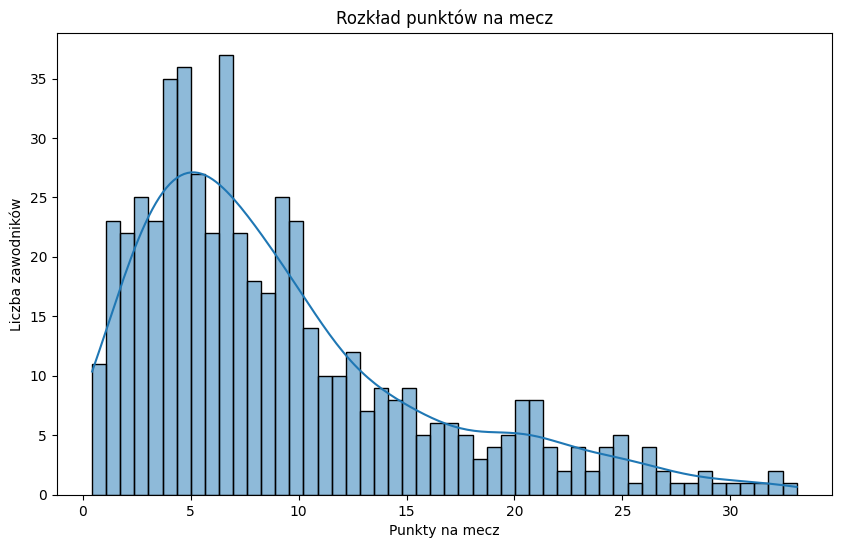

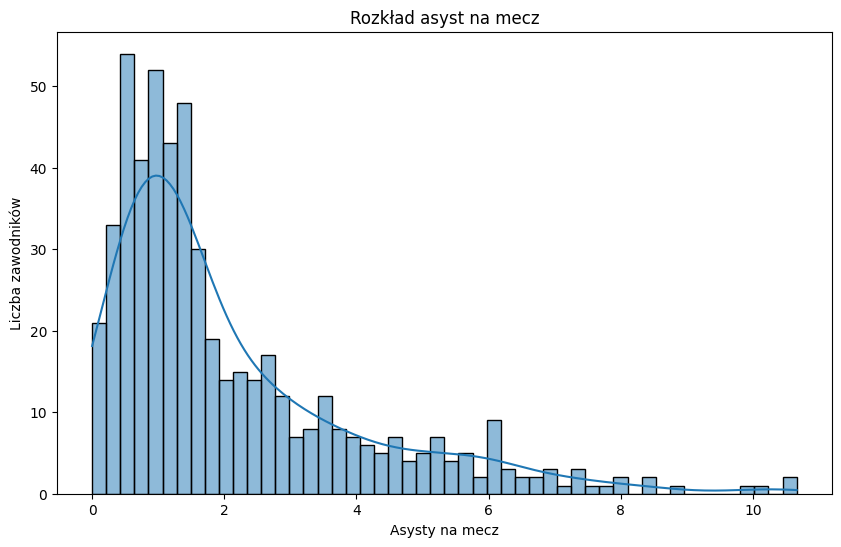

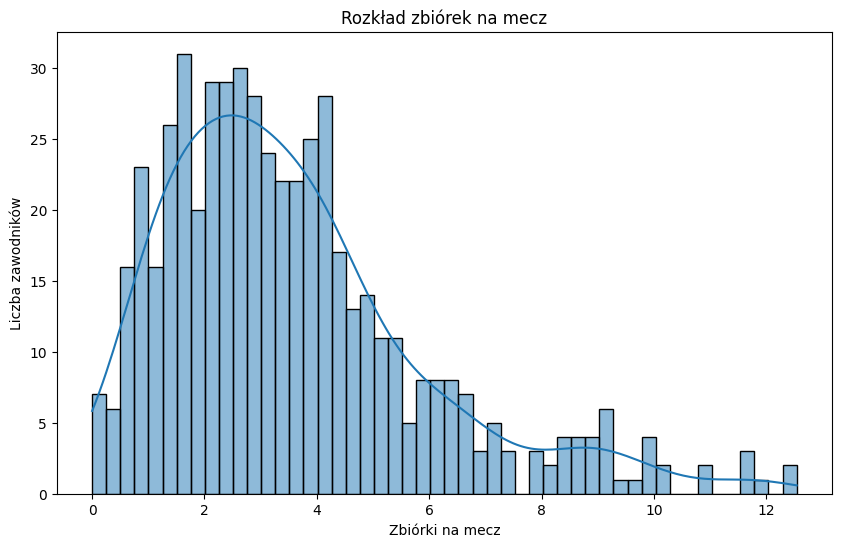

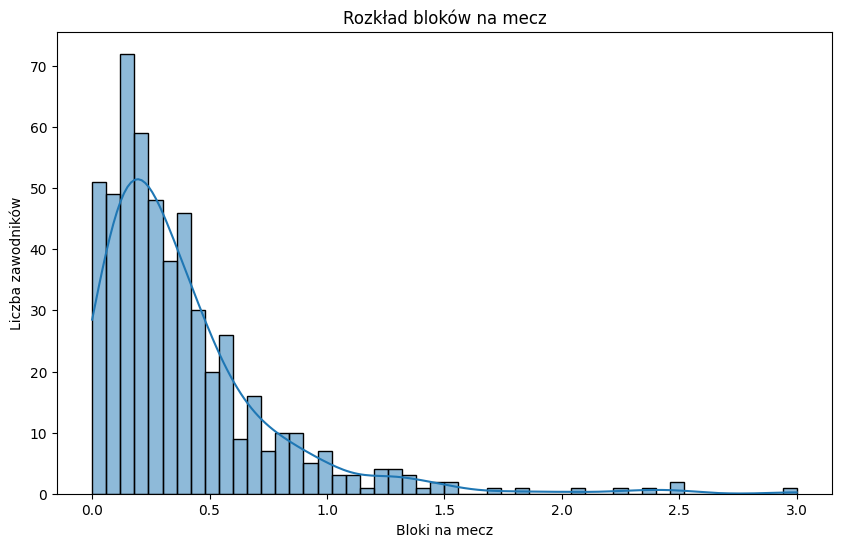

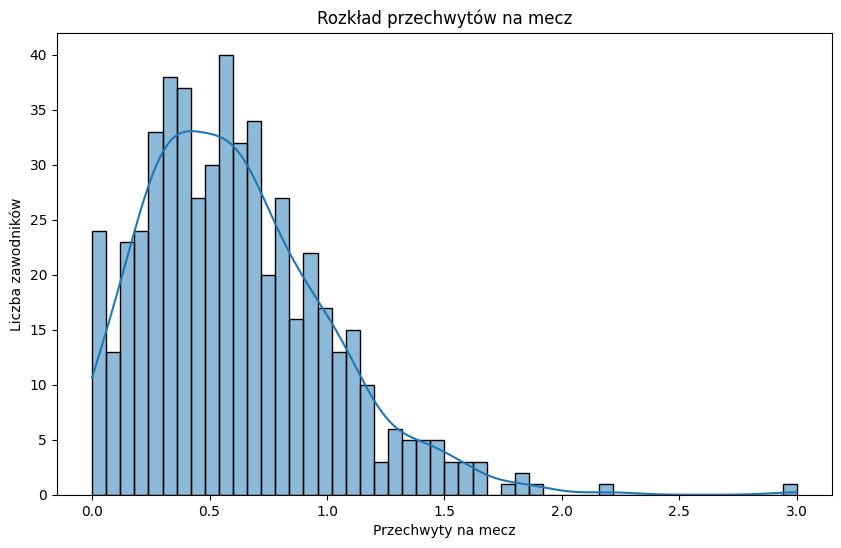

In [85]:
# Usunięcie brakujących wartości
nba = nba.dropna()

# Eksploracyjna analiza danych (EDA)
plt.figure(figsize=(10, 6))
sns.histplot(nba['pts_avg'], bins=50, kde=True)
plt.title('Rozkład punktów na mecz')
plt.xlabel('Punkty na mecz')
plt.ylabel('Liczba zawodników')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(nba['ast_avg'], bins=50, kde=True)
plt.title('Rozkład asyst na mecz')
plt.xlabel('Asysty na mecz')
plt.ylabel('Liczba zawodników')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(nba['reb_avg'], bins=50, kde=True)
plt.title('Rozkład zbiórek na mecz')
plt.xlabel('Zbiórki na mecz')
plt.ylabel('Liczba zawodników')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(nba['blk_avg'], bins=50, kde=True)
plt.title('Rozkład bloków na mecz')
plt.xlabel('Bloki na mecz')
plt.ylabel('Liczba zawodników')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(nba['stl_avg'], bins=50, kde=True)
plt.title('Rozkład przechwytów na mecz')
plt.xlabel('Przechwyty na mecz')
plt.ylabel('Liczba zawodników')
plt.show()


In [86]:
nba.describe()

,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,25.981273,48.473783,19.943109,9.204195,2.084682,3.564888,1.110393,0.611854,0.383483,157.602996,31.825843,0.014981
std,4.322334,24.353600,9.462331,6.815427,1.934919,2.345771,0.824410,0.396655,0.384095,160.995915,13.429251,148.917053
min,19.000000,1.000000,1.840000,0.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-642.000000
25%,23.000000,31.000000,12.587500,4.227500,0.792500,1.850000,0.530000,0.330000,0.140000,18.000000,28.525000,-70.000000
50%,25.000000,55.000000,19.265000,7.105000,1.385000,3.045000,0.885000,0.560000,0.280000,109.500000,34.300000,-7.500000
75%,29.000000,68.000000,28.367500,12.180000,2.757500,4.537500,1.500000,0.830000,0.500000,252.250000,38.500000,57.000000
max,42.000000,83.000000,40.800000,33.080000,10.660000,12.540000,4.110000,3.000000,3.000000,731.000000,100.000000,640.000000


#najlepsi 3pkt

In [87]:
#najlepsi rzucający za 3 pkt, podstawowi
best_3p = nba[(nba['min_avg'] > 24) & (nba['3PA'] > 337)].sort_values(by='3P%', ascending=False)

best_3p.head(10)

,PName,POS,Team,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-
62,Tyrese Maxey,PG,PHI,22,60,33.60,20.30,3.53,2.93,1.33,0.82,0.13,369,43.4,241
20,Stephen Curry,PG,GSW,35,56,34.66,29.43,6.29,6.09,3.20,0.93,0.36,639,42.7,268
44,Buddy Hield,SG,IND,30,80,31.02,16.80,2.81,5.00,1.74,1.15,0.32,677,42.5,-84
123,Corey Kispert,SF,WAS,24,74,28.29,11.08,1.18,2.80,0.74,0.43,0.12,384,42.4,-124
85,Michael Porter Jr.,SF,DEN,24,62,29.00,17.42,1.05,5.50,1.10,0.60,0.47,454,41.4,418
29,Klay Thompson,SG,GSW,33,69,33.03,21.87,2.36,4.14,1.78,0.71,0.42,731,41.2,163
54,Bojan Bogdanovic,SF,DET,34,59,32.08,21.58,2.58,3.78,2.29,0.58,0.14,353,41.1,-330
100,Keegan Murray,SF,SAC,22,80,29.77,12.20,1.23,4.64,0.75,0.76,0.52,501,41.1,99
31,Darius Garland,PG,CLE,23,69,35.47,21.59,7.80,2.68,2.88,1.23,0.13,412,41.0,438
58,Desmond Bane,SG,MEM,24,58,31.75,21.50,4.38,5.02,2.17,0.97,0.38,407,40.8,356


In [88]:
best_3p.describe()

,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,26.797468,69.367089,32.515190,18.663291,4.026582,4.726203,2.011392,0.975063,0.416962,456.569620,37.039241,57.303797
std,4.182932,9.120528,2.965115,5.875485,2.314558,1.804455,0.855781,0.334575,0.345400,100.307308,3.083015,234.233685
min,19.000000,36.000000,25.840000,7.190000,1.050000,1.940000,0.460000,0.420000,0.070000,338.000000,30.700000,-642.000000
25%,24.000000,63.000000,30.320000,14.170000,2.310000,3.515000,1.320000,0.730000,0.210000,377.500000,34.250000,-57.000000
50%,26.000000,71.000000,32.610000,19.350000,3.530000,4.390000,2.030000,0.910000,0.320000,419.000000,37.400000,80.000000
75%,30.000000,77.000000,35.115000,21.730000,5.620000,5.225000,2.640000,1.145000,0.525000,510.000000,39.100000,209.500000
max,38.000000,83.000000,37.340000,32.390000,10.660000,11.010000,4.110000,1.910000,2.470000,731.000000,43.400000,488.000000


#ZADANIOWCY 3P

In [89]:
#rezerwowi 3p

sub_3p = nba[(nba['min_avg'] < 19.94)]
sub_3p.describe()

,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.00000,283.000000,283.000000,283.000000,283.000000
mean,25.505300,35.908127,12.306431,4.598940,0.963887,2.243604,0.594982,0.38364,0.255371,64.996466,30.154417,-28.180212
std,4.418185,22.141038,4.747538,2.315261,0.670574,1.327096,0.339850,0.24463,0.245500,74.887788,15.902817,75.370099
min,19.000000,1.000000,1.840000,0.430000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-327.000000
25%,22.000000,15.000000,8.765000,2.915000,0.505000,1.280000,0.350000,0.21500,0.085000,9.000000,24.050000,-70.000000
50%,25.000000,37.000000,12.910000,4.440000,0.840000,2.000000,0.580000,0.35000,0.190000,33.000000,32.800000,-16.000000
75%,28.000000,56.000000,15.780000,6.160000,1.290000,2.990000,0.830000,0.54000,0.365000,101.500000,37.750000,10.000000
max,42.000000,82.000000,19.860000,11.770000,3.500000,7.070000,1.760000,1.38000,1.480000,394.000000,100.000000,219.000000


In [90]:
#best reserve 3pointers
sub_3p = nba[(nba['min_avg'] < 19.94) & (nba['3PA'] > 64)].sort_values(by='3P%', ascending=False)

sub_3p = sub_3p.head(11)

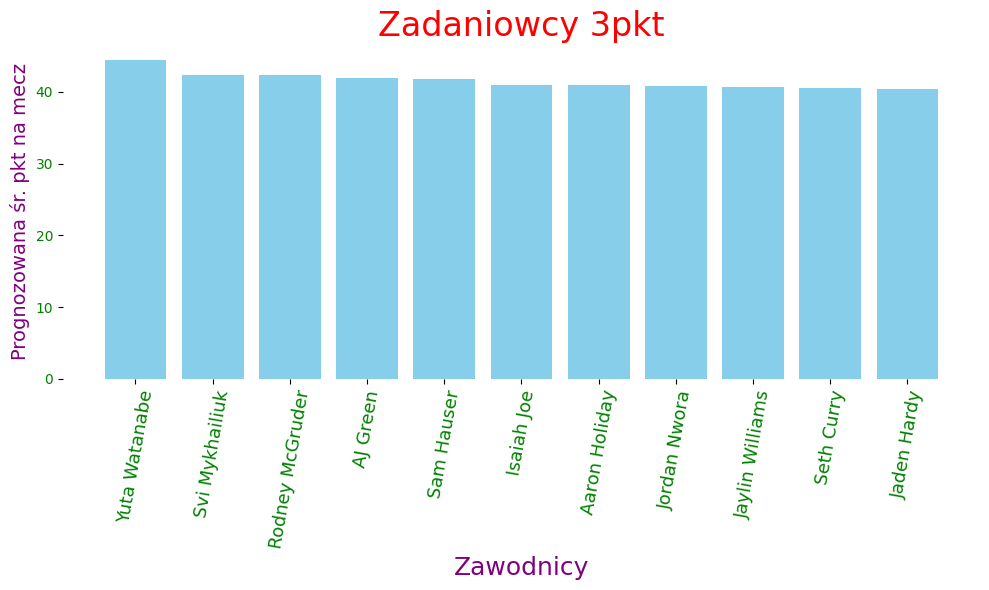

In [91]:
#dane do wykresu
x = sub_3p['PName']
y = sub_3p['3P%']

#stworzenie wykresu

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue')
plt.xlabel('Zawodnicy', fontsize=18, color='purple')
plt.ylabel('Prognozowana śr. pkt na mecz', fontsize=14, color='purple')
plt.title('Zadaniowcy 3pkt', fontsize=24, color='red')
plt.xticks(rotation=80, fontsize=13, color='green')
plt.yticks(fontsize=10, color='green')
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.tight_layout()
#plt.savefig('zadaniowcy_3pkt.jpg')
plt.show()

#Zadaniowcy obroncy

In [92]:
defence = nba[(nba['min_avg'] < 19.94)]
defence.describe()

,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.00000,283.000000,283.000000,283.000000,283.000000
mean,25.505300,35.908127,12.306431,4.598940,0.963887,2.243604,0.594982,0.38364,0.255371,64.996466,30.154417,-28.180212
std,4.418185,22.141038,4.747538,2.315261,0.670574,1.327096,0.339850,0.24463,0.245500,74.887788,15.902817,75.370099
min,19.000000,1.000000,1.840000,0.430000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-327.000000
25%,22.000000,15.000000,8.765000,2.915000,0.505000,1.280000,0.350000,0.21500,0.085000,9.000000,24.050000,-70.000000
50%,25.000000,37.000000,12.910000,4.440000,0.840000,2.000000,0.580000,0.35000,0.190000,33.000000,32.800000,-16.000000
75%,28.000000,56.000000,15.780000,6.160000,1.290000,2.990000,0.830000,0.54000,0.365000,101.500000,37.750000,10.000000
max,42.000000,82.000000,19.860000,11.770000,3.500000,7.070000,1.760000,1.38000,1.480000,394.000000,100.000000,219.000000


In [93]:
best_def = defence[(defence['reb_avg'] > 2.99) &
                   (defence['stl_avg'] > 0.54) &
                   (defence['blk_avg'] > 0.36)]
best_def

,PName,POS,Team,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-
132,Naz Reid,C,MIN,23,68,18.40,11.49,1.13,4.90,1.35,0.62,0.78,217,34.6,-128
208,Brandon Clarke,PF,MEM,26,56,19.47,9.98,1.29,5.54,0.98,0.61,0.66,6,16.7,-14
217,Josh Okogie,SF,PHX,24,72,18.76,7.35,1.46,3.49,0.88,0.78,0.47,197,33.5,106
250,Xavier Tillman,F,MEM,24,61,19.35,7.03,1.57,5.03,0.72,0.95,0.48,15,26.7,-1
257,Jordan Goodwin,G,WAS,24,62,17.83,6.56,2.71,3.31,0.92,0.94,0.42,118,32.2,-117
258,Isaiah Hartenstein,C,NYK,24,82,19.86,4.95,1.24,6.54,0.80,0.65,0.78,37,21.6,151
259,Andre Drummond,C,CHI,29,67,12.67,5.96,0.49,6.63,1.12,0.67,0.40,3,0.0,25
264,Mark Williams,C,CHA,21,43,19.26,9.00,0.42,7.07,0.93,0.65,1.05,0,0.0,-79
305,Robert Covington,PF,LAC,32,48,16.22,6.00,1.19,3.46,0.67,0.79,0.69,136,39.7,-7
306,Paul Reed,SF,PHI,23,69,10.94,4.16,0.39,3.80,0.65,0.65,0.74,6,16.7,-17


In [94]:
best_def['def_pts'] = (best_def['reb_avg'] * 1.3) + (best_def['stl_avg'] * 1.3) + (best_def['blk_avg'] * 1.3)
best_df = best_def.sort_values(by='def_pts', ascending=False)
best_df

<ipython-input-94-92a45d700e1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_def['def_pts'] = (best_def['reb_avg'] * 1.3) + (best_def['stl_avg'] * 1.3) + (best_def['blk_avg'] * 1.3)


,PName,POS,Team,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-,def_pts
264,Mark Williams,C,CHA,21,43,19.26,9.00,0.42,7.07,0.93,0.65,1.05,0,0.0,-79,11.401
258,Isaiah Hartenstein,C,NYK,24,82,19.86,4.95,1.24,6.54,0.80,0.65,0.78,37,21.6,151,10.361
259,Andre Drummond,C,CHI,29,67,12.67,5.96,0.49,6.63,1.12,0.67,0.40,3,0.0,25,10.010
208,Brandon Clarke,PF,MEM,26,56,19.47,9.98,1.29,5.54,0.98,0.61,0.66,6,16.7,-14,8.853
250,Xavier Tillman,F,MEM,24,61,19.35,7.03,1.57,5.03,0.72,0.95,0.48,15,26.7,-1,8.398
132,Naz Reid,C,MIN,23,68,18.40,11.49,1.13,4.90,1.35,0.62,0.78,217,34.6,-128,8.190
306,Paul Reed,SF,PHI,23,69,10.94,4.16,0.39,3.80,0.65,0.65,0.74,6,16.7,-17,6.747
338,Usman Garuba,PF,HOU,21,75,12.94,3.00,0.85,4.09,0.63,0.59,0.39,59,40.7,-253,6.591
305,Robert Covington,PF,LAC,32,48,16.22,6.00,1.19,3.46,0.67,0.79,0.69,136,39.7,-7,6.422
463,Xavier Cooks,G,WAS,27,10,12.58,3.80,0.60,3.80,0.80,0.60,0.40,1,0.0,19,6.240


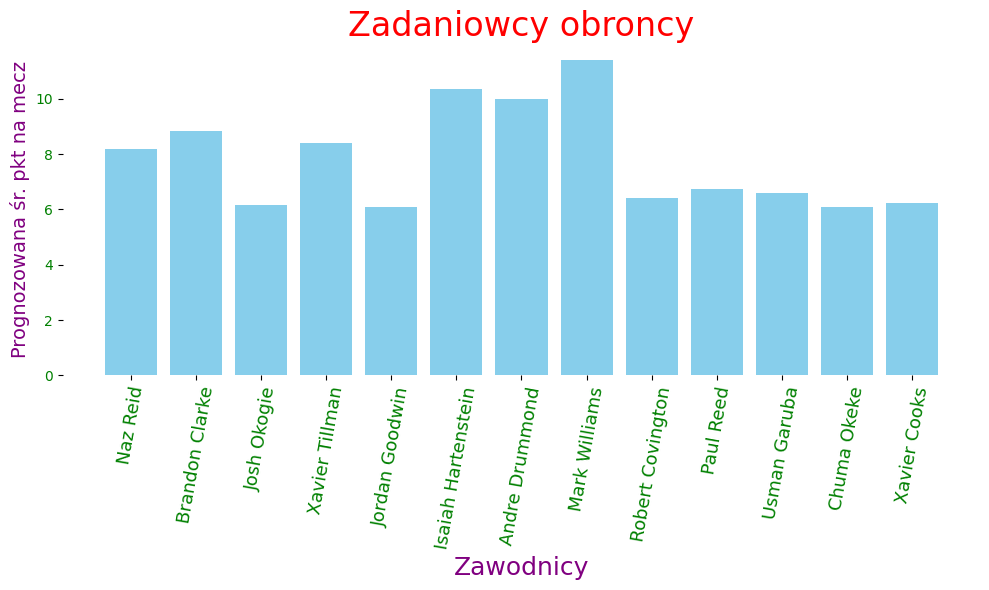

In [95]:
#dane do wykresu
x = best_def['PName']
y = best_def['def_pts']

#stworzenie wykresu

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue')
plt.xlabel('Zawodnicy', fontsize=18, color='purple')
plt.ylabel('Prognozowana śr. pkt na mecz', fontsize=14, color='purple')
plt.title('Zadaniowcy obroncy', fontsize=24, color='red')
plt.xticks(rotation=80, fontsize=13, color='green')
plt.yticks(fontsize=10, color='green')
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.tight_layout()
#plt.savefig('zadaniowcy_def.jpg')
plt.show()

#najgorszy bilans +/-

In [96]:
#najgorszy bilans +/- na boisku
worst_diff = nba.sort_values(by='+/-', ascending=True).head(40)
worst_diff = worst_diff[['PName', 'Team', 'Age', 'POS', 'min_avg', '+/-']]
worst_diff

,PName,Team,Age,POS,min_avg,+/-
65,Jaden Ivey,DET,21,PG,31.14,-642
97,Jabari Smith Jr.,HOU,19,PF,31.02,-555
130,Killian Hayes,DET,21,PG,28.34,-500
39,Keldon Johnson,SAS,23,SF,32.75,-491
17,Jalen Green,HOU,21,SG,34.24,-447
74,P.J. Washington,CHA,24,PF,32.60,-375
90,Kenyon Martin Jr.,HOU,22,F,27.95,-368
166,Malaki Branham,SAS,19,G,23.48,-364
76,Kevin Porter Jr.,HOU,22,SG,34.30,-343
54,Bojan Bogdanovic,DET,34,SF,32.08,-330


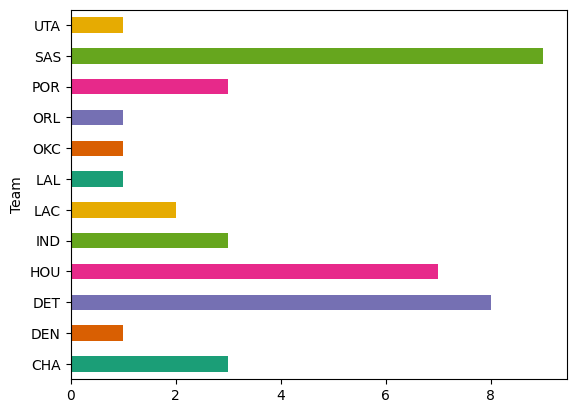

In [97]:
#rozklad zawodnikow wg. klubow

worst_diff.groupby('Team').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.show()

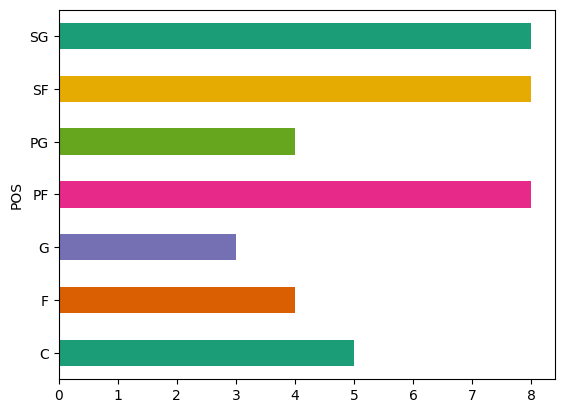

In [98]:
#rozklad zawodnikow wg. pozycji

worst_diff.groupby('POS').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.show()

#najlepiej punktujący

In [99]:
#najlepiej punktujący
top_pts = nba[(nba['GP'] > 41)].sort_values(by='pts_avg', ascending=False)
top_pts = top_pts.head(30)
review_pts = top_pts[['PName', 'POS', 'Team', 'Age', 'GP', 'min_avg', 'pts_avg']]
review_pts

,PName,POS,Team,Age,GP,min_avg,pts_avg
1,Joel Embiid,C,PHI,29,66,34.61,33.08
2,Luka Doncic,PG,DAL,24,66,36.22,32.39
10,Damian Lillard,PG,POR,32,58,36.32,32.17
3,Shai Gilgeous-Alexander,PG,OKC,24,68,35.53,31.40
4,Giannis Antetokounmpo,PF,MIL,28,63,32.12,31.10
0,Jayson Tatum,SF,BOS,25,74,36.92,30.07
20,Stephen Curry,PG,GSW,35,56,34.66,29.43
41,Kevin Durant,PF,PHX,34,47,35.57,29.06
24,LeBron James,SF,LAL,38,55,35.53,28.91
7,Donovan Mitchell,SG,CLE,26,68,35.77,28.26


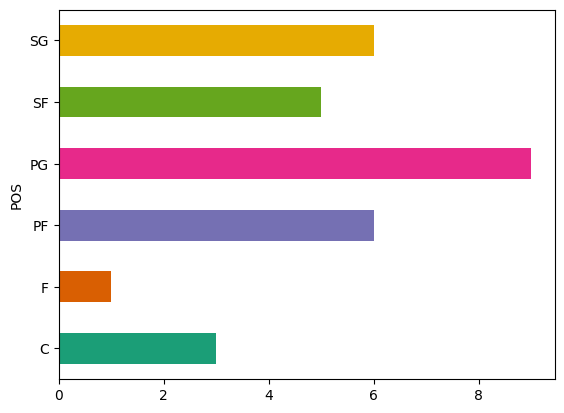

In [100]:
#najlepiej punktujacy wg. pozycji
review_pts.groupby('POS').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.show()

#najlepsi pg

In [101]:
#wybór podstawowego PG

pg = nba[nba['POS'] == 'PG']
main_pg = pg[pg['min_avg'] > 24]

In [102]:
main_pg.describe()

,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,27.121951,63.658537,31.173171,17.491707,5.931463,4.094146,2.279268,1.049024,0.347805,334.878049,34.675610,56.341463
std,4.749711,12.301646,3.684458,7.253925,1.828314,1.397392,0.834492,0.289394,0.209553,145.956363,7.197284,227.706676
min,21.000000,12.000000,24.240000,6.190000,2.460000,2.120000,0.900000,0.540000,0.070000,2.000000,0.000000,-642.000000
25%,23.000000,60.000000,28.280000,11.520000,4.550000,3.030000,1.620000,0.830000,0.210000,261.000000,33.300000,-35.000000
50%,26.000000,67.000000,32.010000,16.270000,6.100000,3.890000,2.280000,1.040000,0.310000,342.000000,35.000000,84.000000
75%,30.000000,69.000000,34.500000,21.590000,6.720000,4.840000,2.940000,1.280000,0.450000,412.000000,38.200000,176.000000
max,37.000000,82.000000,37.340000,32.390000,10.450000,8.620000,4.110000,1.650000,0.960000,658.000000,44.400000,488.000000


In [103]:
best_pg = main_pg[(main_pg['pts_avg'] > 17.49) & (main_pg['ast_avg'] > 5.93) & (main_pg['tov_avg'] < 4)]
best_pg

,PName,POS,Team,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-
2,Luka Doncic,PG,DAL,24,66,36.22,32.39,8.02,8.62,3.58,1.36,0.50,541,34.2,128
10,Damian Lillard,PG,POR,32,58,36.32,32.17,7.33,4.78,3.29,0.86,0.31,658,37.1,105
11,De'Aaron Fox,PG,SAC,25,73,33.36,25.01,6.12,4.19,2.48,1.14,0.32,367,32.4,176
20,Stephen Curry,PG,GSW,35,56,34.66,29.43,6.29,6.09,3.20,0.93,0.36,639,42.7,268
21,Jalen Brunson,PG,NYK,26,68,34.98,24.01,6.19,3.54,2.09,0.90,0.22,322,41.6,152
23,Ja Morant,PG,MEM,23,61,31.94,26.16,8.08,5.85,3.38,1.08,0.26,300,30.7,302
31,Darius Garland,PG,CLE,23,69,35.47,21.59,7.80,2.68,2.88,1.23,0.13,412,41.0,438
50,Jamal Murray,PG,DEN,26,65,32.82,19.97,6.15,3.95,2.23,1.02,0.25,432,39.8,300
52,Jrue Holiday,PG,MIL,32,67,32.57,19.25,7.39,5.09,2.94,1.18,0.37,411,38.4,481
56,D'Angelo Russell,PG,LAL,27,71,32.45,17.79,6.15,3.03,2.62,0.99,0.41,490,39.6,85


In [104]:
best_pg['virtual_pts'] = best_pg['pts_avg'] + (best_pg['ast_avg'] * 1.3) + (best_pg['blk_avg'] * 1.3) - (best_pg['tov_avg'] * 1.3)
best_pg.sort_values(by='virtual_pts', ascending=False)

<ipython-input-104-f6cf110d4035>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_pg['virtual_pts'] = best_pg['pts_avg'] + (best_pg['ast_avg'] * 1.3) + (best_pg['blk_avg'] * 1.3) - (best_pg['tov_avg'] * 1.3)


,PName,POS,Team,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-,virtual_pts
2,Luka Doncic,PG,DAL,24,66,36.22,32.39,8.02,8.62,3.58,1.36,0.50,541,34.2,128,38.812
10,Damian Lillard,PG,POR,32,58,36.32,32.17,7.33,4.78,3.29,0.86,0.31,658,37.1,105,37.825
20,Stephen Curry,PG,GSW,35,56,34.66,29.43,6.29,6.09,3.20,0.93,0.36,639,42.7,268,33.915
23,Ja Morant,PG,MEM,23,61,31.94,26.16,8.08,5.85,3.38,1.08,0.26,300,30.7,302,32.608
70,Tyrese Haliburton,PG,IND,23,56,33.62,20.71,10.45,3.66,2.52,1.62,0.45,402,40.0,-35,31.604
11,De'Aaron Fox,PG,SAC,25,73,33.36,25.01,6.12,4.19,2.48,1.14,0.32,367,32.4,176,30.158
116,LaMelo Ball,PG,CHA,21,36,35.22,23.28,8.44,6.42,3.58,1.28,0.31,383,37.6,-150,30.001
21,Jalen Brunson,PG,NYK,26,68,34.98,24.01,6.19,3.54,2.09,0.90,0.22,322,41.6,152,29.626
31,Darius Garland,PG,CLE,23,69,35.47,21.59,7.80,2.68,2.88,1.23,0.13,412,41.0,438,28.155
52,Jrue Holiday,PG,MIL,32,67,32.57,19.25,7.39,5.09,2.94,1.18,0.37,411,38.4,481,25.516


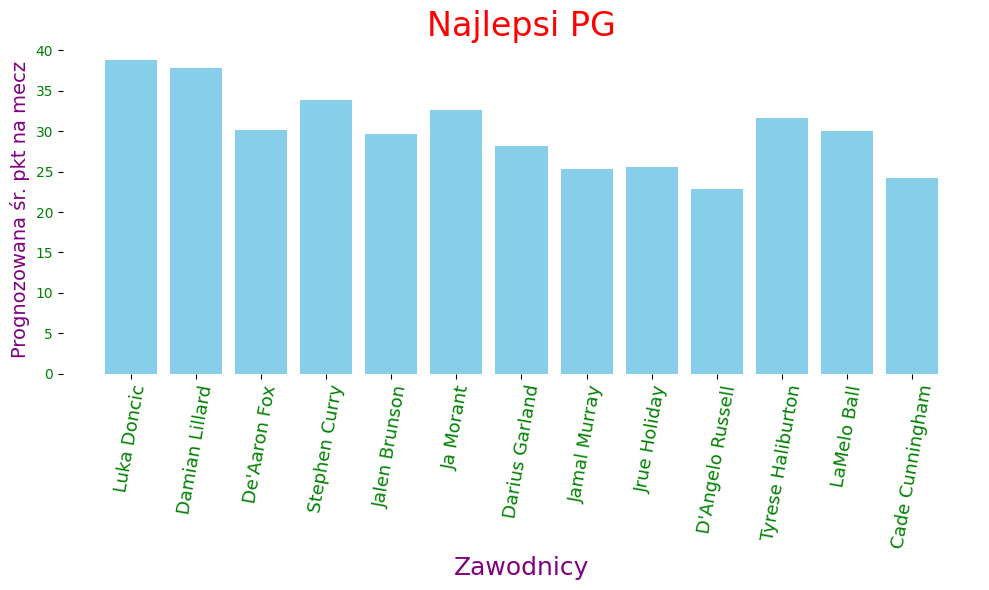

In [105]:
#wizualizacja wynikow

#dane do wykresu
x = best_pg['PName']
y = best_pg['virtual_pts']

#stworzenie wykresu

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue')
plt.xlabel('Zawodnicy', fontsize=18, color='purple')
plt.ylabel('Prognozowana śr. pkt na mecz', fontsize=14, color='purple')
plt.title('Najlepsi PG', fontsize=24, color='red')
plt.xticks(rotation=80, fontsize=13, color='green')
plt.yticks(fontsize=10, color='green')
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.tight_layout()
#plt.savefig('najlepsi_pg.jpg')
plt.show()

#rezerwowy pg

In [106]:
sec_pg = pg[pg['min_avg'] < 20]
sec_pg.describe()

,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,27.137931,42.413793,13.670000,5.236897,1.975517,1.504138,0.744483,0.426552,0.143103,104.827586,32.227586,-22.206897
std,4.867708,18.438154,3.998308,2.270648,0.815706,0.516807,0.305071,0.211293,0.091772,86.933090,5.253291,67.594579
min,21.000000,4.000000,4.900000,1.470000,0.920000,0.410000,0.200000,0.000000,0.000000,3.000000,16.700000,-159.000000
25%,23.000000,31.000000,10.520000,3.470000,1.280000,1.260000,0.500000,0.260000,0.080000,34.000000,29.500000,-51.000000
50%,25.000000,44.000000,13.390000,5.180000,1.790000,1.450000,0.750000,0.400000,0.150000,87.000000,32.100000,-6.000000
75%,32.000000,53.000000,17.150000,6.700000,2.390000,1.780000,0.930000,0.580000,0.190000,134.000000,35.800000,25.000000
max,36.000000,80.000000,19.800000,11.770000,3.500000,2.800000,1.460000,0.840000,0.420000,338.000000,44.100000,84.000000


In [107]:
sec_pg = sec_pg[(sec_pg['pts_avg'] > 3.47) & (sec_pg['ast_avg'] > 1.28) & (sec_pg['tov_avg'] < 2) & (sec_pg['3P%'] > 30.2)]
sec_pg

,PName,POS,Team,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-
170,Bones Hyland,PG,LAC,22,56,19.38,11.77,3.07,2.41,1.46,0.70,0.27,315,37.1,-129
215,Devonte' Graham,PG,SAS,28,73,18.33,7.38,2.68,1.67,0.73,0.62,0.22,338,35.2,-159
222,Tre Mann,PG,OKC,22,67,17.66,7.72,1.79,2.31,0.93,0.60,0.16,257,31.5,57
243,Davion Mitchell,PG,SAC,24,80,18.09,5.62,2.31,1.31,0.78,0.55,0.19,197,32.0,1
251,Cory Joseph,PG,DET,31,62,19.80,6.89,3.50,1.71,0.90,0.55,0.15,180,38.9,-110
274,Goran Dragic,PG,MIL,36,58,15.00,6.29,2.60,1.40,1.09,0.22,0.07,145,35.9,5
312,Payton Pritchard,PG,BOS,25,48,13.39,5.62,1.33,1.83,0.83,0.29,0.02,154,36.4,12
327,Malachi Flynn,PG,TOR,24,53,13.03,4.64,1.32,1.43,0.47,0.40,0.08,133,35.3,-40
328,Patty Mills,PG,BKN,34,40,14.16,6.15,1.40,1.10,0.75,0.38,0.08,134,36.6,-66
329,Duane Washington Jr.,PG,NYK,23,31,12.70,7.87,2.03,1.16,1.10,0.19,0.13,111,36.0,-6


In [108]:
sec_pg['virtual_pts'] = sec_pg['pts_avg'] + (sec_pg['ast_avg'] * 1.3) + (sec_pg['blk_avg'] * 1.3) - (sec_pg['tov_avg'] * 1.3)
sec_pg.sort_values(by='virtual_pts', ascending=False)

,PName,POS,Team,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-,virtual_pts
170,Bones Hyland,PG,LAC,22,56,19.38,11.77,3.07,2.41,1.46,0.70,0.27,315,37.1,-129,14.214
251,Cory Joseph,PG,DET,31,62,19.80,6.89,3.50,1.71,0.90,0.55,0.15,180,38.9,-110,10.465
215,Devonte' Graham,PG,SAS,28,73,18.33,7.38,2.68,1.67,0.73,0.62,0.22,338,35.2,-159,10.201
329,Duane Washington Jr.,PG,NYK,23,31,12.70,7.87,2.03,1.16,1.10,0.19,0.13,111,36.0,-6,9.248
222,Tre Mann,PG,OKC,22,67,17.66,7.72,1.79,2.31,0.93,0.60,0.16,257,31.5,57,9.046
274,Goran Dragic,PG,MIL,36,58,15.00,6.29,2.60,1.40,1.09,0.22,0.07,145,35.9,5,8.344
243,Davion Mitchell,PG,SAC,24,80,18.09,5.62,2.31,1.31,0.78,0.55,0.19,197,32.0,1,7.856
334,George Hill,PG,IND,36,46,18.12,5.04,2.39,1.85,0.74,0.57,0.13,95,35.8,41,7.354
376,Jordan McLaughlin,PG,MIN,27,43,15.78,3.74,3.44,1.44,0.77,0.74,0.09,78,30.8,84,7.328
328,Patty Mills,PG,BKN,34,40,14.16,6.15,1.40,1.10,0.75,0.38,0.08,134,36.6,-66,7.099


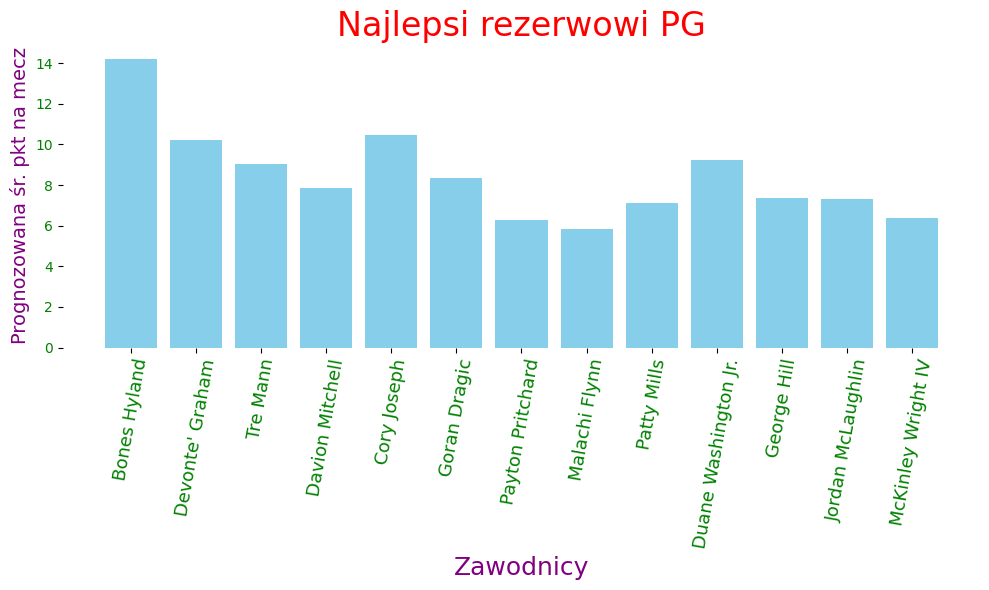

In [109]:
#dane do wykresu
x = sec_pg['PName']
y = sec_pg['virtual_pts']

#stworzenie wykresu

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue')
plt.xlabel('Zawodnicy', fontsize=18, color='purple')
plt.ylabel('Prognozowana śr. pkt na mecz', fontsize=14, color='purple')
plt.title('Najlepsi rezerwowi PG', fontsize=24, color='red')
plt.xticks(rotation=80, fontsize=13, color='green')
plt.yticks(fontsize=10, color='green')
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.tight_layout()
#plt.savefig('rezerwowi_pg.jpg')
plt.show()

#wybor SG

In [110]:
#wybór podstawowego SG

sg = nba[nba['POS'] == 'SG']
main_sg = sg[sg['min_avg'] > 24]
main_sg.describe()

,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,25.977778,66.333333,31.183778,16.703333,3.744222,4.085778,1.837333,1.046222,0.329778,401.955556,37.253333,37.733333
std,3.683433,14.737090,3.607613,5.692663,1.942018,1.329490,0.762363,0.355919,0.142868,164.576309,3.503025,207.109699
min,20.000000,6.000000,24.420000,7.380000,1.120000,1.940000,0.580000,0.420000,0.080000,26.000000,31.000000,-447.000000
25%,23.000000,59.000000,28.490000,11.540000,2.410000,3.170000,1.230000,0.780000,0.230000,310.000000,34.400000,-84.000000
50%,26.000000,71.000000,31.150000,16.690000,3.480000,3.920000,1.670000,0.970000,0.320000,390.000000,37.200000,42.000000
75%,29.000000,76.000000,34.300000,20.970000,4.430000,4.530000,2.440000,1.350000,0.400000,543.000000,39.800000,195.000000
max,34.000000,82.000000,36.810000,28.260000,10.660000,7.880000,3.360000,1.840000,0.730000,731.000000,46.200000,493.000000


In [111]:
best_sg = main_sg[(main_sg['pts_avg'] > 16.69) & (main_sg['ast_avg'] > 3.48) & (main_sg['tov_avg'] < 4) & (main_sg['3P%'] > 30)]
best_sg

,PName,POS,Team,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-
5,Anthony Edwards,SG,MIN,21,79,35.97,24.63,4.43,5.80,3.28,1.58,0.73,578,36.9,97
7,Donovan Mitchell,SG,CLE,26,68,35.77,28.26,4.43,4.25,2.65,1.46,0.40,635,38.6,338
9,Zach LaVine,SG,CHI,28,77,35.95,24.84,4.25,4.48,2.52,0.90,0.23,544,37.5,18
17,Jalen Green,SG,HOU,21,76,34.24,22.14,3.70,3.74,2.63,0.78,0.24,554,33.8,-447
18,Jordan Poole,SG,GSW,23,82,29.98,20.43,4.50,2.74,3.07,0.77,0.26,637,33.6,-11
25,CJ McCollum,SG,NOP,31,75,35.32,20.91,5.72,4.37,2.44,0.93,0.51,543,38.9,59
27,Dejounte Murray,SG,ATL,26,74,36.40,20.47,6.05,5.26,2.16,1.51,0.26,387,34.4,-62
33,Devin Booker,SG,PHX,26,53,34.63,27.75,5.53,4.53,2.74,0.96,0.34,316,35.1,247
45,Fred VanVleet,SG,TOR,29,69,36.74,19.35,7.17,4.06,2.03,1.78,0.55,606,34.2,195
47,Terry Rozier,SG,CHA,29,63,35.25,21.10,5.06,4.11,2.13,1.17,0.25,505,32.7,-288


In [112]:
best_sg['virtual_pts'] = best_sg['pts_avg'] + (best_sg['ast_avg'] * 1.3) + (best_sg['blk_avg'] * 1.3) - (best_sg['tov_avg'] * 1.3)
best_sg = best_sg.sort_values(by='virtual_pts', ascending=False)
best_sg = best_sg.head(10)
best_sg

<ipython-input-112-8816a16cb42c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_sg['virtual_pts'] = best_sg['pts_avg'] + (best_sg['ast_avg'] * 1.3) + (best_sg['blk_avg'] * 1.3) - (best_sg['tov_avg'] * 1.3)


,PName,POS,Team,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-,virtual_pts
33,Devin Booker,SG,PHX,26,53,34.63,27.75,5.53,4.53,2.74,0.96,0.34,316,35.1,247,31.819
63,James Harden,SG,PHI,33,58,36.81,20.97,10.66,6.10,3.36,1.22,0.53,418,38.5,277,31.149
7,Donovan Mitchell,SG,CLE,26,68,35.77,28.26,4.43,4.25,2.65,1.46,0.40,635,38.6,338,31.094
9,Zach LaVine,SG,CHI,28,77,35.95,24.84,4.25,4.48,2.52,0.90,0.23,544,37.5,18,27.388
69,Bradley Beal,SG,WAS,29,50,33.46,23.20,5.42,3.92,2.90,0.90,0.66,219,36.5,42,27.334
5,Anthony Edwards,SG,MIN,21,79,35.97,24.63,4.43,5.80,3.28,1.58,0.73,578,36.9,97,27.074
45,Fred VanVleet,SG,TOR,29,69,36.74,19.35,7.17,4.06,2.03,1.78,0.55,606,34.2,195,26.747
27,Dejounte Murray,SG,ATL,26,74,36.40,20.47,6.05,5.26,2.16,1.51,0.26,387,34.4,-62,25.865
25,CJ McCollum,SG,NOP,31,75,35.32,20.91,5.72,4.37,2.44,0.93,0.51,543,38.9,59,25.837
47,Terry Rozier,SG,CHA,29,63,35.25,21.10,5.06,4.11,2.13,1.17,0.25,505,32.7,-288,25.234


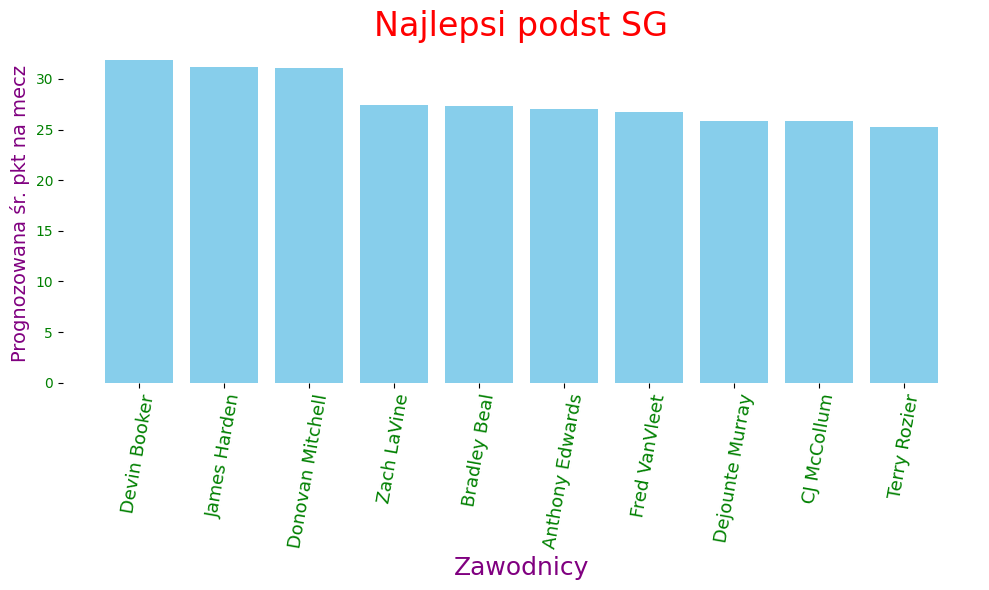

In [113]:
#dane do wykresu
x = best_sg['PName']
y = best_sg['virtual_pts']

#stworzenie wykresu

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue')
plt.xlabel('Zawodnicy', fontsize=18, color='purple')
plt.ylabel('Prognozowana śr. pkt na mecz', fontsize=14, color='purple')
plt.title('Najlepsi podst SG', fontsize=24, color='red')
plt.xticks(rotation=80, fontsize=13, color='green')
plt.yticks(fontsize=10, color='green')
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.tight_layout()
#plt.savefig('podst_sg.jpg')
plt.show()

#rezerwowy sg

In [114]:
sec_sg = sg[sg['min_avg'] < 20]
sec_sg.describe()

,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,24.794118,41.852941,14.082059,5.553824,1.180000,1.740000,0.698235,0.527941,0.158824,102.735294,33.617647,-40.617647
std,3.764100,21.580199,4.365906,2.475258,0.554497,0.764912,0.319066,0.230109,0.142547,86.256948,9.841054,82.076836
min,19.000000,3.000000,3.470000,1.500000,0.330000,0.000000,0.000000,0.140000,0.000000,1.000000,0.000000,-225.000000
25%,22.000000,25.500000,11.392500,3.825000,0.822500,1.192500,0.447500,0.357500,0.082500,31.750000,28.675000,-95.750000
50%,25.000000,45.500000,14.800000,5.310000,1.140000,1.690000,0.715000,0.530000,0.115000,94.500000,35.000000,-15.000000
75%,26.000000,58.500000,17.582500,6.862500,1.385000,2.170000,0.920000,0.635000,0.207500,138.750000,39.050000,1.250000
max,36.000000,73.000000,19.850000,10.830000,3.000000,3.460000,1.510000,1.170000,0.710000,394.000000,50.000000,213.000000


In [115]:
sec_sg = sec_sg[(sec_sg['pts_avg'] > 5.55) & (sec_sg['ast_avg'] > 1.18) & (sec_sg['tov_avg'] < 4) & (sec_sg['3P%'] > 30)]
sec_sg

,PName,POS,Team,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-
160,Isaiah Joe,SG,OKC,23,73,19.11,9.47,1.21,2.40,0.53,0.66,0.11,394,40.9,213
196,Cam Thomas,SG,BKN,21,57,16.62,10.60,1.37,1.67,1.11,0.35,0.12,133,38.3,-4
207,Seth Curry,SG,BKN,32,61,19.85,9.20,1.62,1.64,0.84,0.59,0.11,232,40.5,-69
276,Nickeil Alexander-Walker,SG,MIN,24,59,14.98,6.15,1.83,1.71,0.93,0.54,0.36,159,38.4,-51
277,Chris Duarte,SG,IND,25,46,19.50,7.87,1.39,2.50,0.89,0.54,0.20,174,31.6,-114
293,Ty Jerome,SG,GSW,25,45,18.12,6.87,3.00,1.73,0.67,0.51,0.11,90,38.9,-92
341,Svi Mykhailiuk,SG,CHA,25,32,14.62,6.94,1.66,1.66,0.75,0.47,0.12,99,42.4,20
356,James Bouknight,SG,CHA,22,34,15.16,5.62,1.21,2.12,0.94,0.41,0.15,109,30.3,-97
372,Evan Fournier,SG,NYK,30,27,16.99,6.11,1.33,1.81,0.81,0.59,0.11,114,30.7,-54
464,Jared Butler,SG,OKC,22,6,12.75,6.17,1.33,0.67,0.83,0.83,0.00,14,50.0,-1


In [116]:
sec_sg['virtual_pts'] = sec_sg['pts_avg'] + (sec_sg['ast_avg'] * 1.3) + (sec_sg['blk_avg'] * 1.3) - (sec_sg['tov_avg'] * 1.3)
sec_sg = sec_sg.sort_values(by='virtual_pts', ascending=False)
sec_sg

,PName,POS,Team,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-,virtual_pts
196,Cam Thomas,SG,BKN,21,57,16.62,10.60,1.37,1.67,1.11,0.35,0.12,133,38.3,-4,11.094
160,Isaiah Joe,SG,OKC,23,73,19.11,9.47,1.21,2.40,0.53,0.66,0.11,394,40.9,213,10.497
207,Seth Curry,SG,BKN,32,61,19.85,9.20,1.62,1.64,0.84,0.59,0.11,232,40.5,-69,10.357
293,Ty Jerome,SG,GSW,25,45,18.12,6.87,3.00,1.73,0.67,0.51,0.11,90,38.9,-92,10.042
277,Chris Duarte,SG,IND,25,46,19.50,7.87,1.39,2.50,0.89,0.54,0.20,174,31.6,-114,8.780
341,Svi Mykhailiuk,SG,CHA,25,32,14.62,6.94,1.66,1.66,0.75,0.47,0.12,99,42.4,20,8.279
276,Nickeil Alexander-Walker,SG,MIN,24,59,14.98,6.15,1.83,1.71,0.93,0.54,0.36,159,38.4,-51,7.788
372,Evan Fournier,SG,NYK,30,27,16.99,6.11,1.33,1.81,0.81,0.59,0.11,114,30.7,-54,6.929
464,Jared Butler,SG,OKC,22,6,12.75,6.17,1.33,0.67,0.83,0.83,0.00,14,50.0,-1,6.820
356,James Bouknight,SG,CHA,22,34,15.16,5.62,1.21,2.12,0.94,0.41,0.15,109,30.3,-97,6.166


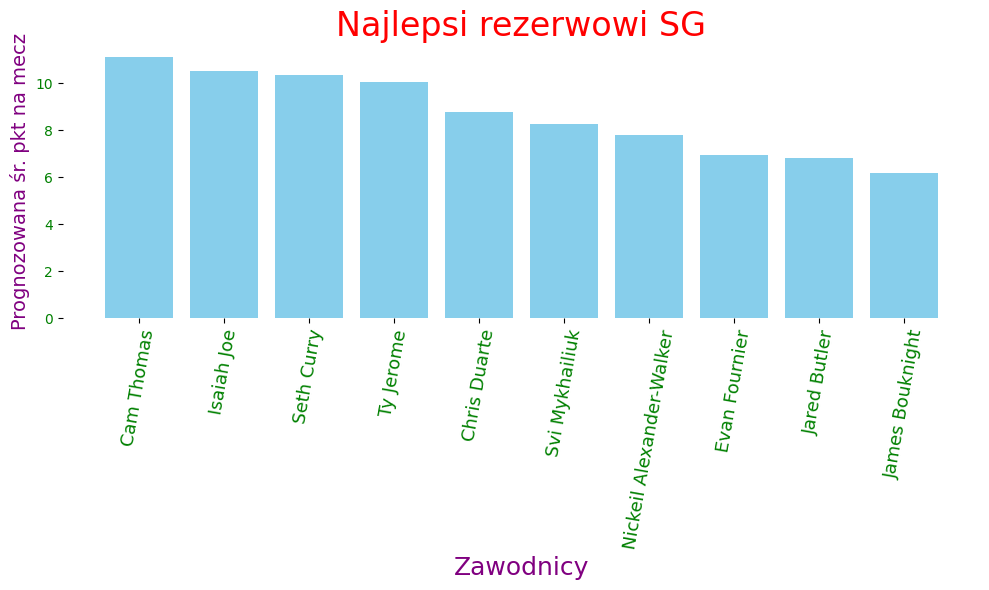

In [117]:
#dane do wykresu
x = sec_sg['PName']
y = sec_sg['virtual_pts']

#stworzenie wykresu

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue')
plt.xlabel('Zawodnicy', fontsize=18, color='purple')
plt.ylabel('Prognozowana śr. pkt na mecz', fontsize=14, color='purple')
plt.title('Najlepsi rezerwowi SG', fontsize=24, color='red')
plt.xticks(rotation=80, fontsize=13, color='green')
plt.yticks(fontsize=10, color='green')
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.tight_layout()
#plt.savefig('rezerwowi_sg.jpg')
plt.show()

#niski skrzydlowy

In [118]:
#wybór podstawowego SF

sf = nba[nba['POS'] == 'SF']
main_sf = sf[sf['min_avg'] > 24]
main_sf.describe()

,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.00000,38.000000,38.000000,38.000000
mean,27.236842,64.263158,30.744737,16.029474,2.843947,4.821053,1.581842,0.928947,0.42000,305.263158,36.781579,34.763158
std,4.277118,16.955720,3.664335,6.041138,1.539090,1.360359,0.719000,0.332068,0.24464,140.247018,4.267467,184.927807
min,21.000000,1.000000,24.270000,7.120000,1.050000,2.200000,0.460000,0.430000,0.00000,8.000000,28.100000,-491.000000
25%,24.000000,59.750000,28.392500,11.110000,1.537500,4.057500,1.035000,0.700000,0.21000,224.250000,33.350000,-47.000000
50%,26.500000,68.000000,30.320000,15.185000,2.415000,4.475000,1.510000,0.875000,0.40000,296.500000,36.550000,41.500000
75%,31.000000,76.000000,33.560000,20.392500,3.872500,5.375000,2.000000,1.087500,0.62500,393.750000,39.575000,145.500000
max,38.000000,83.000000,36.920000,30.070000,6.820000,8.770000,3.290000,1.910000,0.91000,686.000000,50.000000,470.000000


In [119]:
best_sf = main_sf[(main_sf['pts_avg'] > 16.01) &
                  (main_sf['ast_avg'] > 2.8) &
                  (main_sf['tov_avg'] < 4) &
                  (main_sf['3P%'] > 30) &
                  (main_sf['reb_avg'] > 4.05)]

best_sf

,PName,POS,Team,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-
0,Jayson Tatum,SF,BOS,25,74,36.92,30.07,4.62,8.77,2.88,1.05,0.69,686,35.0,470
12,DeMar DeRozan,SF,CHI,33,74,36.24,24.54,5.09,4.64,2.07,1.12,0.49,142,32.4,67
19,Mikal Bridges,SF,BKN,26,83,35.70,20.13,3.29,4.39,1.53,1.10,0.73,442,38.2,36
24,LeBron James,SF,LAL,38,55,35.53,28.91,6.82,8.31,3.24,0.91,0.58,377,32.1,214
32,Franz Wagner,SF,ORL,21,80,32.61,18.56,3.54,4.11,2.09,0.96,0.21,360,36.1,50
34,Jimmy Butler,SF,MIA,33,64,33.41,22.91,5.31,5.86,1.58,1.83,0.33,103,35.0,47
39,Keldon Johnson,SF,SAS,23,63,32.75,21.98,2.90,5.05,2.13,0.73,0.17,407,32.9,-491
42,Kyle Kuzma,SF,WAS,27,64,34.98,21.20,3.73,7.23,2.97,0.56,0.45,481,33.3,10
60,Kawhi Leonard,SF,LAC,31,52,33.61,23.83,3.92,6.50,1.69,1.38,0.54,250,41.6,220
81,Brandon Ingram,SF,NOP,25,45,34.18,24.71,5.82,5.47,3.29,0.71,0.42,164,39.0,96


In [120]:
best_sf['virtual_pts'] = best_sf['pts_avg'] + (best_sf['ast_avg'] * 1.3) + (best_sf['blk_avg'] * 1.3) - (best_sf['tov_avg'] * 1.3) + (best_sf['reb_avg'] * 1.3)
best_sf = best_sf.sort_values(by='virtual_pts', ascending=False)
best_sf

<ipython-input-120-f44bd058b697>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_sf['virtual_pts'] = best_sf['pts_avg'] + (best_sf['ast_avg'] * 1.3) + (best_sf['blk_avg'] * 1.3) - (best_sf['tov_avg'] * 1.3) + (best_sf['reb_avg'] * 1.3)


,PName,POS,Team,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-,virtual_pts
24,LeBron James,SF,LAL,38,55,35.53,28.91,6.82,8.31,3.24,0.91,0.58,377,32.1,214,45.121
0,Jayson Tatum,SF,BOS,25,74,36.92,30.07,4.62,8.77,2.88,1.05,0.69,686,35.0,470,44.630
60,Kawhi Leonard,SF,LAC,31,52,33.61,23.83,3.92,6.50,1.69,1.38,0.54,250,41.6,220,35.881
34,Jimmy Butler,SF,MIA,33,64,33.41,22.91,5.31,5.86,1.58,1.83,0.33,103,35.0,47,35.806
81,Brandon Ingram,SF,NOP,25,45,34.18,24.71,5.82,5.47,3.29,0.71,0.42,164,39.0,96,35.656
12,DeMar DeRozan,SF,CHI,33,74,36.24,24.54,5.09,4.64,2.07,1.12,0.49,142,32.4,67,35.135
42,Kyle Kuzma,SF,WAS,27,64,34.98,21.20,3.73,7.23,2.97,0.56,0.45,481,33.3,10,32.172
39,Keldon Johnson,SF,SAS,23,63,32.75,21.98,2.90,5.05,2.13,0.73,0.17,407,32.9,-491,29.767
19,Mikal Bridges,SF,BKN,26,83,35.70,20.13,3.29,4.39,1.53,1.10,0.73,442,38.2,36,29.074
32,Franz Wagner,SF,ORL,21,80,32.61,18.56,3.54,4.11,2.09,0.96,0.21,360,36.1,50,26.061


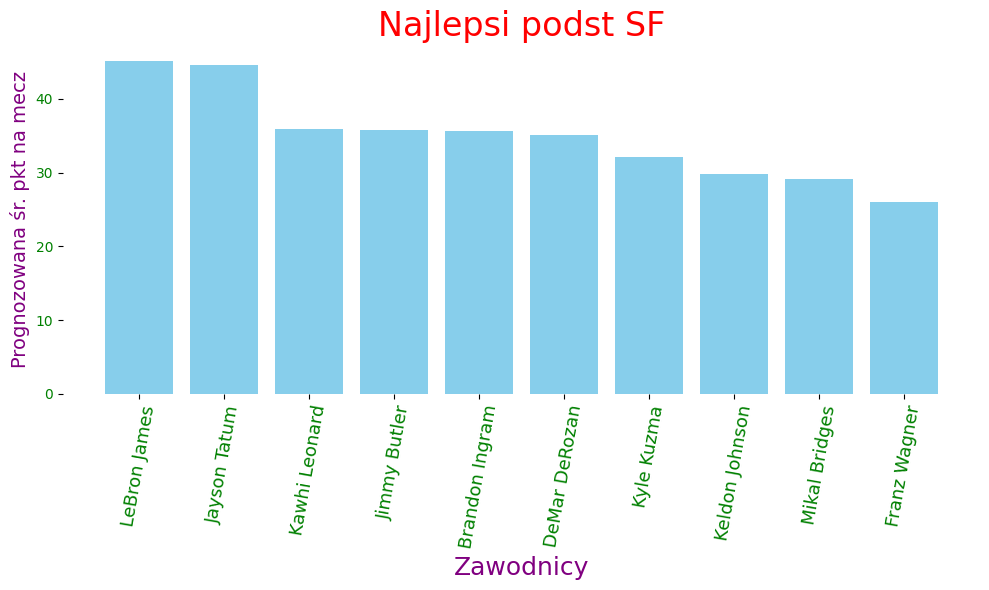

In [121]:
#dane do wykresu
x = best_sf['PName']
y = best_sf['virtual_pts']

#stworzenie wykresu

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue')
plt.xlabel('Zawodnicy', fontsize=18, color='purple')
plt.ylabel('Prognozowana śr. pkt na mecz', fontsize=14, color='purple')
plt.title('Najlepsi podst SF', fontsize=24, color='red')
plt.xticks(rotation=80, fontsize=13, color='green')
plt.yticks(fontsize=10, color='green')
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.tight_layout()
#plt.savefig('podst_sf.jpg')
plt.show()

#rezerwowy SF

In [122]:
sec_sf = sf[sf['min_avg'] < 20]
sec_sf.describe()

,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,26.645161,46.419355,13.632903,4.813871,0.876129,2.357419,0.501935,0.420645,0.293548,98.129032,31.074194,-30.483871
std,4.070613,21.565055,4.434385,2.138631,0.423302,1.055032,0.268917,0.249879,0.285255,94.247101,9.935625,100.829847
min,21.000000,5.000000,4.670000,0.870000,0.330000,0.440000,0.000000,0.000000,0.000000,5.000000,0.000000,-252.000000
25%,23.500000,33.500000,10.935000,3.570000,0.525000,1.640000,0.340000,0.280000,0.165000,20.500000,25.100000,-85.500000
50%,26.000000,52.000000,14.880000,5.000000,0.830000,2.390000,0.480000,0.390000,0.200000,74.000000,33.300000,-17.000000
75%,29.000000,63.000000,16.445000,6.260000,1.010000,3.040000,0.655000,0.515000,0.345000,142.000000,37.250000,13.500000
max,36.000000,80.000000,19.380000,8.740000,2.230000,4.480000,1.100000,1.380000,1.480000,384.000000,45.000000,219.000000


In [123]:
sec_sf = sec_sf[(sec_sf['pts_avg'] > 4.81) &
                 (sec_sf['ast_avg'] > 0.87) &
                 (sec_sf['tov_avg'] < 4) &
                 (sec_sf['3P%'] > 30) &
                 (sec_sf['reb_avg'] > 1.64)]

sec_sf

,PName,POS,Team,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-
185,Georges Niang,SF,PHI,29,78,19.38,8.17,0.99,2.37,0.69,0.40,0.18,384,40.1,75
213,Jordan Nwora,SF,IND,24,62,19.16,8.74,1.42,3.69,1.06,0.39,0.23,211,40.8,-252
217,Josh Okogie,SF,PHX,24,72,18.76,7.35,1.46,3.49,0.88,0.78,0.47,197,33.5,106
223,Sam Hauser,SF,BOS,25,80,16.12,6.40,0.89,2.55,0.38,0.36,0.26,335,41.8,219
281,Nassir Little,SF,POR,23,54,18.08,6.65,0.93,2.61,0.67,0.37,0.37,158,36.7,-190
292,T.J. Warren,SF,PHX,29,42,16.35,7.48,0.95,2.88,0.48,0.52,0.29,67,32.8,55
297,Vlatko Cancar,SF,DEN,26,60,14.82,4.95,1.33,2.13,0.62,0.37,0.23,115,37.4,-66
365,Stanley Johnson,SF,SAS,26,30,15.65,5.80,2.23,3.17,1.10,0.53,0.20,40,45.0,-92
454,Otto Porter Jr.,SF,TOR,29,8,18.29,5.50,1.00,2.38,0.50,1.38,0.00,17,35.3,-21


In [124]:
sec_sf['virtual_pts'] = sec_sf['pts_avg'] + (sec_sf['ast_avg'] * 1.3) + (sec_sf['blk_avg'] * 1.3) - (sec_sf['tov_avg'] * 1.3) + (sec_sf['reb_avg'] * 1.3)
sec_sf = sec_sf.sort_values(by='virtual_pts', ascending=False)
sec_sf

,PName,POS,Team,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-,virtual_pts
213,Jordan Nwora,SF,IND,24,62,19.16,8.74,1.42,3.69,1.06,0.39,0.23,211,40.8,-252,14.304
217,Josh Okogie,SF,PHX,24,72,18.76,7.35,1.46,3.49,0.88,0.78,0.47,197,33.5,106,13.252
292,T.J. Warren,SF,PHX,29,42,16.35,7.48,0.95,2.88,0.48,0.52,0.29,67,32.8,55,12.212
185,Georges Niang,SF,PHI,29,78,19.38,8.17,0.99,2.37,0.69,0.40,0.18,384,40.1,75,11.875
365,Stanley Johnson,SF,SAS,26,30,15.65,5.80,2.23,3.17,1.10,0.53,0.20,40,45.0,-92,11.650
281,Nassir Little,SF,POR,23,54,18.08,6.65,0.93,2.61,0.67,0.37,0.37,158,36.7,-190,10.862
223,Sam Hauser,SF,BOS,25,80,16.12,6.40,0.89,2.55,0.38,0.36,0.26,335,41.8,219,10.716
454,Otto Porter Jr.,SF,TOR,29,8,18.29,5.50,1.00,2.38,0.50,1.38,0.00,17,35.3,-21,9.244
297,Vlatko Cancar,SF,DEN,26,60,14.82,4.95,1.33,2.13,0.62,0.37,0.23,115,37.4,-66,8.941


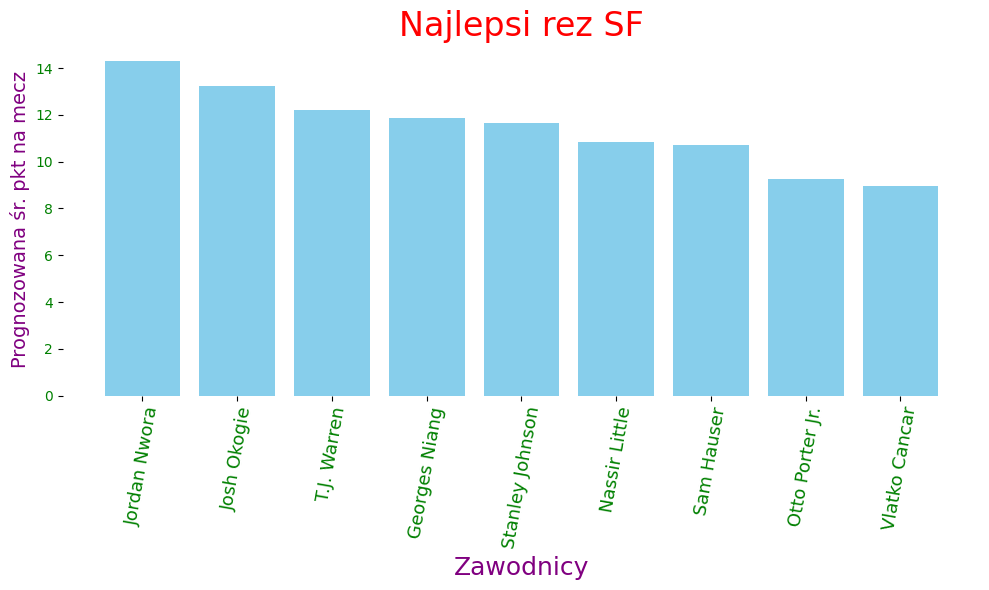

In [125]:
#dane do wykresu
x = sec_sf['PName']
y = sec_sf['virtual_pts']

#stworzenie wykresu

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue')
plt.xlabel('Zawodnicy', fontsize=18, color='purple')
plt.ylabel('Prognozowana śr. pkt na mecz', fontsize=14, color='purple')
plt.title('Najlepsi rez SF', fontsize=24, color='red')
plt.xticks(rotation=80, fontsize=13, color='green')
plt.yticks(fontsize=10, color='green')
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
#plt.savefig('sf_rezerwowi.jpg')
plt.tight_layout()
plt.show()

#silny skrzydlowy

In [126]:
pf = nba[nba['POS'] == 'PF']
pf.describe()

,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,26.797297,55.918919,21.723919,9.739730,1.797973,4.862162,1.148108,0.596081,0.591486,150.918919,32.228378,15.040541
std,4.819992,20.981895,8.495761,6.929334,1.529176,2.464264,0.827405,0.288662,0.462704,132.900391,8.219981,173.585038
min,19.000000,4.000000,5.820000,1.090000,0.000000,1.190000,0.140000,0.000000,0.000000,4.000000,0.000000,-555.000000
25%,23.000000,43.000000,14.640000,5.052500,0.865000,3.260000,0.580000,0.342500,0.302500,47.000000,28.900000,-73.750000
50%,26.000000,62.500000,21.025000,7.870000,1.295000,4.245000,0.900000,0.590000,0.505000,111.500000,34.000000,-7.000000
75%,30.000000,73.750000,29.630000,11.900000,2.042500,6.395000,1.420000,0.830000,0.772500,239.000000,38.900000,107.250000
max,42.000000,82.000000,37.350000,31.100000,7.250000,12.540000,3.900000,1.270000,3.000000,636.000000,44.400000,518.000000


In [127]:
main_pf = pf[pf['min_avg'] > 24]

In [128]:
best_pf = main_pf[(main_pf['pts_avg'] > 9.73) & (main_pf['reb_avg'] > 3.26) & (main_pf['3P%'] > 30) & (main_pf['blk_avg'] > 0.30)]
best_pf

,PName,POS,Team,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-
14,Pascal Siakam,PF,TOR,29,71,37.35,24.23,5.85,7.83,2.38,0.92,0.51,287,32.4,123
15,Lauri Markkanen,PF,UTA,25,66,34.43,25.62,1.86,8.64,1.92,0.64,0.58,510,39.2,163
28,Domantas Sabonis,PF,SAC,26,79,34.63,19.11,7.25,12.32,2.91,0.82,0.49,83,37.3,212
41,Kevin Durant,PF,PHX,34,47,35.57,29.06,5.00,6.66,3.32,0.72,1.43,230,40.4,258
68,Jaren Jackson Jr.,PF,MEM,23,63,28.37,18.62,0.95,6.76,1.70,1.03,3.00,282,35.5,366
74,P.J. Washington,PF,CHA,24,73,32.60,15.67,2.40,4.90,1.51,0.90,1.08,428,34.8,-375
82,Aaron Gordon,PF,DEN,27,68,30.22,16.31,2.99,6.56,1.44,0.79,0.75,173,34.7,518
84,Tobias Harris,PF,PHI,30,74,32.92,14.66,2.51,5.73,1.20,0.92,0.54,324,38.9,296
97,Jabari Smith Jr.,PF,HOU,19,79,31.02,12.78,1.28,7.20,1.32,0.54,0.94,391,30.7,-555
104,Jaden McDaniels,PF,MIN,22,79,30.59,12.06,1.87,3.89,1.42,0.94,0.96,269,39.8,70


In [129]:
best_pf['virtual_pts'] = best_pf['pts_avg'] + (best_pf['ast_avg'] * 1.3) + (best_pf['blk_avg'] * 1.3) - (best_pf['tov_avg'] * 1.3) + (best_pf['reb_avg'] * 1.3)
best_pf = best_pf.sort_values(by='virtual_pts', ascending=False)
best_pf

<ipython-input-129-9341af98e15f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_pf['virtual_pts'] = best_pf['pts_avg'] + (best_pf['ast_avg'] * 1.3) + (best_pf['blk_avg'] * 1.3) - (best_pf['tov_avg'] * 1.3) + (best_pf['reb_avg'] * 1.3)


,PName,POS,Team,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-,virtual_pts
41,Kevin Durant,PF,PHX,34,47,35.57,29.06,5.00,6.66,3.32,0.72,1.43,230,40.4,258,41.761
28,Domantas Sabonis,PF,SAC,26,79,34.63,19.11,7.25,12.32,2.91,0.82,0.49,83,37.3,212,41.405
14,Pascal Siakam,PF,TOR,29,71,37.35,24.23,5.85,7.83,2.38,0.92,0.51,287,32.4,123,39.583
15,Lauri Markkanen,PF,UTA,25,66,34.43,25.62,1.86,8.64,1.92,0.64,0.58,510,39.2,163,37.528
138,Zion Williamson,PF,NOP,22,29,32.97,26.00,4.59,6.97,3.41,1.10,0.55,19,36.8,149,37.310
68,Jaren Jackson Jr.,PF,MEM,23,63,28.37,18.62,0.95,6.76,1.70,1.03,3.00,282,35.5,366,30.333
82,Aaron Gordon,PF,DEN,27,68,30.22,16.31,2.99,6.56,1.44,0.79,0.75,173,34.7,518,27.828
74,P.J. Washington,PF,CHA,24,73,32.60,15.67,2.40,4.90,1.51,0.90,1.08,428,34.8,-375,24.601
84,Tobias Harris,PF,PHI,30,74,32.92,14.66,2.51,5.73,1.20,0.92,0.54,324,38.9,296,24.514
97,Jabari Smith Jr.,PF,HOU,19,79,31.02,12.78,1.28,7.20,1.32,0.54,0.94,391,30.7,-555,23.310


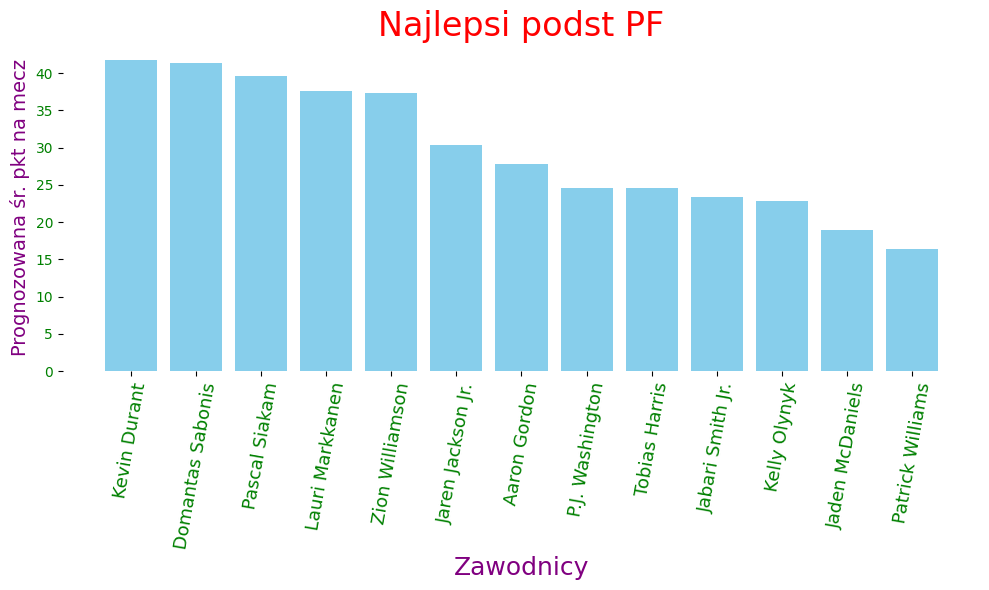

In [130]:
#dane do wykresu
x = best_pf['PName']
y = best_pf['virtual_pts']

#stworzenie wykresu

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue')
plt.xlabel('Zawodnicy', fontsize=18, color='purple')
plt.ylabel('Prognozowana śr. pkt na mecz', fontsize=14, color='purple')
plt.title('Najlepsi podst PF', fontsize=24, color='red')
plt.xticks(rotation=80, fontsize=13, color='green')
plt.yticks(fontsize=10, color='green')
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.tight_layout()
#plt.savefig('pf_podst.jpg')
plt.show()

#rezerwowy PF

In [131]:
sec_pf = pf[pf['min_avg'] < 20]
sec_pf.describe()

,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,27.437500,42.343750,13.754062,5.091563,0.939688,3.188125,0.606875,0.405313,0.356250,73.656250,29.375000,-28.250000
std,5.476857,20.827416,4.164443,2.271998,0.479465,1.287098,0.261157,0.268736,0.228258,75.859637,10.819636,84.704039
min,21.000000,4.000000,5.820000,1.090000,0.000000,1.190000,0.140000,0.000000,0.000000,4.000000,0.000000,-253.000000
25%,22.750000,26.000000,10.367500,3.385000,0.607500,2.075000,0.427500,0.257500,0.190000,15.000000,23.050000,-79.250000
50%,26.000000,43.000000,14.010000,4.930000,0.890000,3.140000,0.575000,0.340000,0.315000,57.000000,31.800000,-11.000000
75%,32.000000,57.500000,17.340000,6.815000,1.292500,3.880000,0.787500,0.530000,0.422500,100.250000,39.100000,10.750000
max,42.000000,75.000000,19.990000,9.980000,2.100000,6.440000,1.150000,1.270000,0.880000,296.000000,44.400000,109.000000


In [132]:
sec_pf = sec_pf[(sec_pf['pts_avg'] > 3.38) &
                (sec_pf['reb_avg'] > 2.07) &
                (sec_pf['3P%'] > 29) &
                (sec_pf['blk_avg'] > 0.19)]
sec_pf

,PName,POS,Team,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-
205,Trey Lyles,PF,SAC,27,74,16.85,7.59,0.89,4.05,0.86,0.36,0.42,240,36.3,105
301,Jeremiah Robinson-Earl,PF,OKC,22,43,18.92,6.79,1.00,4.19,0.44,0.56,0.26,111,33.3,-10
305,Robert Covington,PF,LAC,32,48,16.22,6.00,1.19,3.46,0.67,0.79,0.69,136,39.7,-7
318,Sandro Mamukelashvili,PF,SAS,23,43,15.34,6.12,1.44,4.30,0.81,0.33,0.28,99,30.3,-114
339,Darius Bazley,PF,PHX,22,43,14.33,5.21,0.88,3.21,0.63,0.51,0.79,53,37.7,-70
369,Blake Griffin,PF,BOS,34,41,13.88,4.15,1.49,3.78,0.54,0.34,0.22,66,34.8,105
396,Chuma Okeke,PF,ORL,24,27,19.19,4.74,1.37,3.56,0.63,0.70,0.41,86,30.2,-118
399,Jae Crowder,PF,MIL,32,18,18.87,6.89,1.50,3.83,0.39,0.67,0.33,55,43.6,0
438,Jonathan Isaac,PF,ORL,25,11,11.27,5.00,0.55,4.00,0.36,1.27,0.36,15,40.0,-19


In [133]:
sec_pf['virtual_pts'] = sec_pf['pts_avg'] + (sec_pf['ast_avg'] * 1.3) + (sec_pf['blk_avg'] * 1.3) - (sec_pf['tov_avg'] * 1.3) + (sec_pf['reb_avg'] * 1.3)
sec_pf = sec_pf.sort_values(by='virtual_pts', ascending=False)
sec_pf

,PName,POS,Team,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-,virtual_pts
399,Jae Crowder,PF,MIL,32,18,18.87,6.89,1.50,3.83,0.39,0.67,0.33,55,43.6,0,13.741
205,Trey Lyles,PF,SAC,27,74,16.85,7.59,0.89,4.05,0.86,0.36,0.42,240,36.3,105,13.440
301,Jeremiah Robinson-Earl,PF,OKC,22,43,18.92,6.79,1.00,4.19,0.44,0.56,0.26,111,33.3,-10,13.303
318,Sandro Mamukelashvili,PF,SAS,23,43,15.34,6.12,1.44,4.30,0.81,0.33,0.28,99,30.3,-114,12.893
305,Robert Covington,PF,LAC,32,48,16.22,6.00,1.19,3.46,0.67,0.79,0.69,136,39.7,-7,12.071
438,Jonathan Isaac,PF,ORL,25,11,11.27,5.00,0.55,4.00,0.36,1.27,0.36,15,40.0,-19,10.915
396,Chuma Okeke,PF,ORL,24,27,19.19,4.74,1.37,3.56,0.63,0.70,0.41,86,30.2,-118,10.863
339,Darius Bazley,PF,PHX,22,43,14.33,5.21,0.88,3.21,0.63,0.51,0.79,53,37.7,-70,10.735
369,Blake Griffin,PF,BOS,34,41,13.88,4.15,1.49,3.78,0.54,0.34,0.22,66,34.8,105,10.585


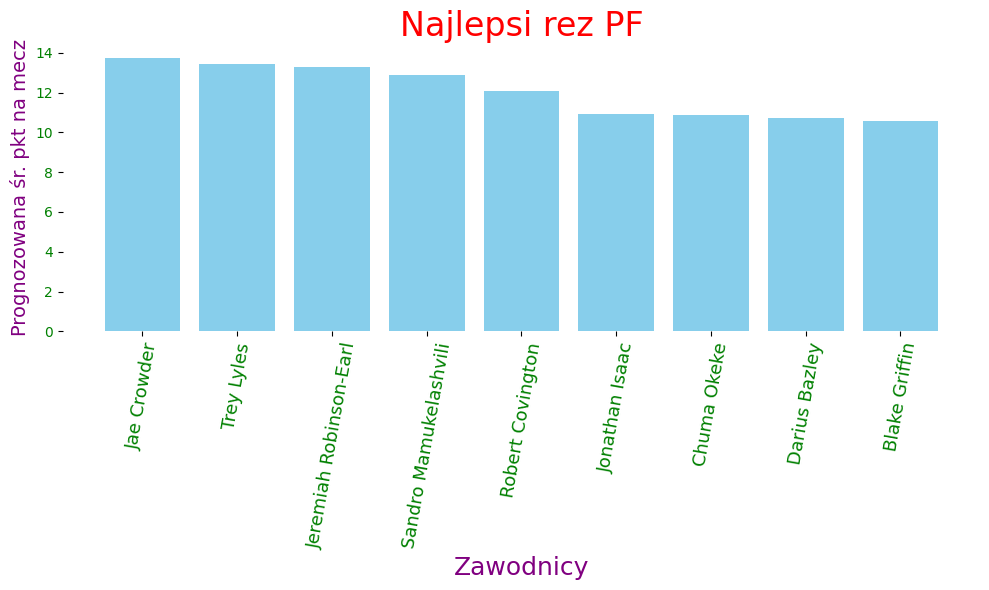

In [134]:
#dane do wykresu
x = sec_pf['PName']
y = sec_pf['virtual_pts']

#stworzenie wykresu

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue')
plt.xlabel('Zawodnicy', fontsize=18, color='purple')
plt.ylabel('Prognozowana śr. pkt na mecz', fontsize=14, color='purple')
plt.title('Najlepsi rez PF', fontsize=24, color='red')
plt.xticks(rotation=80, fontsize=13, color='green')
plt.yticks(fontsize=10, color='green')
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.tight_layout()
#plt.savefig('pf_rezerwowi.jpg')
plt.show()

#podst srodkowi

In [135]:
c = nba[nba['POS'] == 'C']
c.describe()

,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,26.589744,47.461538,18.424487,8.500513,1.286154,5.600513,1.047179,0.441667,0.766667,55.782051,23.937179,9.551282
std,4.075380,23.918526,9.006853,6.073968,1.409354,3.080369,0.739977,0.295048,0.560303,94.351463,22.760858,155.999305
min,19.000000,1.000000,2.590000,0.550000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,-327.000000
25%,24.000000,31.000000,11.642500,4.310000,0.515000,3.000000,0.530000,0.205000,0.400000,2.000000,0.000000,-73.750000
50%,25.500000,51.000000,15.650000,6.775000,0.905000,4.695000,0.860000,0.395000,0.640000,8.000000,25.750000,-7.000000
75%,29.000000,67.750000,26.725000,11.217500,1.437500,8.395000,1.370000,0.650000,0.995000,58.500000,37.475000,45.750000
max,36.000000,82.000000,34.640000,33.080000,9.830000,11.840000,3.580000,1.260000,2.490000,364.000000,100.000000,640.000000


In [136]:
main_c = c[c['min_avg'] > 24]

In [137]:
best_c = main_c[(main_c['pts_avg'] > 8.5) & (main_c['reb_avg'] > 5.6) & (main_c['3P%'] > 23) & (main_c['blk_avg'] > 0.76)]
best_c

,PName,POS,Team,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-
1,Joel Embiid,C,PHI,29,66,34.61,33.08,4.15,10.15,3.42,1.00,1.70,200,33.0,424
30,Kristaps Porzingis,C,WAS,27,65,32.61,23.15,2.68,8.40,2.11,0.89,1.54,356,38.5,80
59,Brook Lopez,C,MIL,35,78,30.42,15.88,1.27,6.67,1.37,0.47,2.47,364,37.4,398
66,Deandre Ayton,C,PHX,24,67,30.38,17.96,1.72,9.96,1.79,0.55,0.79,24,29.2,-7
80,Myles Turner,C,IND,27,62,29.44,17.95,1.44,7.52,1.66,0.58,2.26,249,37.3,-47
83,Alperen Sengun,C,HOU,20,75,28.94,14.79,3.88,9.04,2.57,0.93,0.93,57,33.3,-283
158,Jusuf Nurkic,C,POR,28,52,26.76,13.35,2.87,9.06,2.29,0.83,0.85,119,36.1,9
192,Al Horford,C,BOS,36,63,30.50,9.78,3.00,6.19,0.59,0.48,0.97,325,44.6,309


In [138]:
best_c['virtual_pts'] = best_c['pts_avg'] + (best_c['ast_avg'] * 1.3) + (best_c['blk_avg'] * 1.3) - (best_c['tov_avg'] * 1.3) + (best_c['reb_avg'] * 1.3)
best_c = best_c.sort_values(by='virtual_pts', ascending=False)
best_c

<ipython-input-138-5d7ddb50b9a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_c['virtual_pts'] = best_c['pts_avg'] + (best_c['ast_avg'] * 1.3) + (best_c['blk_avg'] * 1.3) - (best_c['tov_avg'] * 1.3) + (best_c['reb_avg'] * 1.3)


,PName,POS,Team,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-,virtual_pts
1,Joel Embiid,C,PHI,29,66,34.61,33.08,4.15,10.15,3.42,1.00,1.70,200,33.0,424,49.434
30,Kristaps Porzingis,C,WAS,27,65,32.61,23.15,2.68,8.40,2.11,0.89,1.54,356,38.5,80,36.813
66,Deandre Ayton,C,PHX,24,67,30.38,17.96,1.72,9.96,1.79,0.55,0.79,24,29.2,-7,31.844
80,Myles Turner,C,IND,27,62,29.44,17.95,1.44,7.52,1.66,0.58,2.26,249,37.3,-47,30.378
83,Alperen Sengun,C,HOU,20,75,28.94,14.79,3.88,9.04,2.57,0.93,0.93,57,33.3,-283,29.454
59,Brook Lopez,C,MIL,35,78,30.42,15.88,1.27,6.67,1.37,0.47,2.47,364,37.4,398,27.632
158,Jusuf Nurkic,C,POR,28,52,26.76,13.35,2.87,9.06,2.29,0.83,0.85,119,36.1,9,26.987
192,Al Horford,C,BOS,36,63,30.50,9.78,3.00,6.19,0.59,0.48,0.97,325,44.6,309,22.221


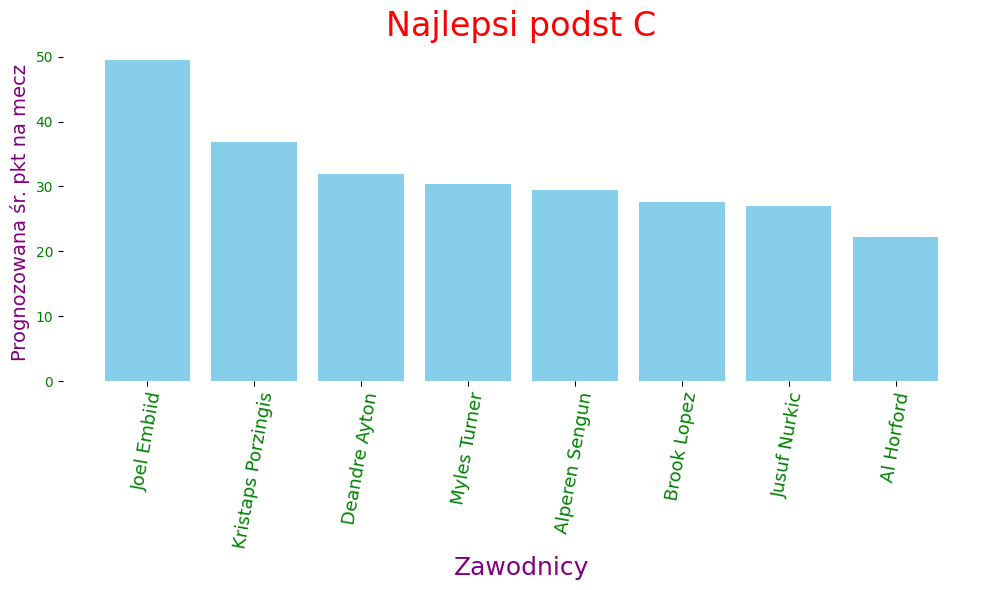

In [139]:
#dane do wykresu
x = best_c['PName']
y = best_c['virtual_pts']

#stworzenie wykresu

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue')
plt.xlabel('Zawodnicy', fontsize=18, color='purple')
plt.ylabel('Prognozowana śr. pkt na mecz', fontsize=14, color='purple')
plt.title('Najlepsi podst C', fontsize=24, color='red')
plt.xticks(rotation=80, fontsize=13, color='green')
plt.yticks(fontsize=10, color='green')
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.tight_layout()
#plt.savefig('c_podst.jpg')
plt.show()

#rexzerwowy c

In [140]:
sec_c = c[c['min_avg'] < 20]
sec_c.describe()

,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,26.562500,37.520833,12.223125,4.988125,0.655000,3.58875,0.657708,0.299375,0.483125,27.229167,26.804167,-15.541667
std,4.109699,22.023189,4.550558,2.518277,0.404186,1.56291,0.316834,0.203485,0.314961,50.667980,25.232063,92.668928
min,21.000000,4.000000,2.590000,0.550000,0.000000,0.29000,0.000000,0.000000,0.000000,0.000000,0.000000,-327.000000
25%,23.000000,16.500000,8.997500,3.427500,0.365000,2.55750,0.437500,0.160000,0.265000,2.000000,0.000000,-76.000000
50%,25.000000,38.000000,12.330000,4.585000,0.585000,3.44500,0.630000,0.245000,0.435000,7.000000,25.000000,-6.000000
75%,30.000000,57.000000,15.005000,6.545000,0.880000,4.55250,0.865000,0.422500,0.632500,21.500000,40.725000,20.500000
max,35.000000,82.000000,19.860000,11.490000,1.710000,7.07000,1.350000,0.940000,1.440000,217.000000,100.000000,204.000000


In [141]:
sec_c = sec_c[(sec_c['pts_avg'] > 4.98) &
              (sec_c['reb_avg'] > 3.5) &
              (sec_c['blk_avg'] > 0.48)]
sec_c

,PName,POS,Team,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-
132,Naz Reid,C,MIN,23,68,18.40,11.49,1.13,4.90,1.35,0.62,0.78,217,34.6,-128
201,Thomas Bryant,C,DEN,25,59,18.33,9.81,0.53,5.75,0.64,0.27,0.51,59,44.1,-93
216,Nick Richards,C,CHA,25,65,18.73,8.18,0.58,6.40,0.91,0.17,1.09,1,100.0,-113
244,James Wiseman,C,DET,22,45,19.27,10.00,0.67,5.93,1.13,0.16,0.60,20,20.0,-327
264,Mark Williams,C,CHA,21,43,19.26,9.00,0.42,7.07,0.93,0.65,1.05,0,0.0,-79
286,Mo Bamba,C,LAL,24,49,15.68,6.59,0.94,4.59,0.61,0.27,0.88,124,38.7,8
349,Charles Bassey,C,SAS,22,35,14.51,5.69,1.37,5.51,1.17,0.46,0.94,8,37.5,-32
350,DeAndre Jordan,C,DEN,34,39,15.02,5.10,0.87,5.18,1.23,0.31,0.59,1,100.0,-119
351,Dewayne Dedmon,C,PHI,33,38,11.22,5.24,0.68,3.53,0.66,0.24,0.50,39,30.8,-124


In [142]:
sec_c['virtual_pts'] = sec_c['pts_avg'] + (sec_c['ast_avg'] * 1.3) + (sec_c['blk_avg'] * 1.3) - (sec_c['tov_avg'] * 1.3) + (sec_c['reb_avg'] * 1.3)
sec_c = sec_c.sort_values(by='virtual_pts', ascending=False)
sec_c

<ipython-input-142-b1c7c752709d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sec_c['virtual_pts'] = sec_c['pts_avg'] + (sec_c['ast_avg'] * 1.3) + (sec_c['blk_avg'] * 1.3) - (sec_c['tov_avg'] * 1.3) + (sec_c['reb_avg'] * 1.3)


,PName,POS,Team,Age,GP,min_avg,pts_avg,ast_avg,reb_avg,tov_avg,stl_avg,blk_avg,3PA,3P%,+/-,virtual_pts
264,Mark Williams,C,CHA,21,43,19.26,9.00,0.42,7.07,0.93,0.65,1.05,0,0.0,-79,18.893
132,Naz Reid,C,MIN,23,68,18.40,11.49,1.13,4.90,1.35,0.62,0.78,217,34.6,-128,18.588
244,James Wiseman,C,DET,22,45,19.27,10.00,0.67,5.93,1.13,0.16,0.60,20,20.0,-327,17.891
201,Thomas Bryant,C,DEN,25,59,18.33,9.81,0.53,5.75,0.64,0.27,0.51,59,44.1,-93,17.805
216,Nick Richards,C,CHA,25,65,18.73,8.18,0.58,6.40,0.91,0.17,1.09,1,100.0,-113,17.488
349,Charles Bassey,C,SAS,22,35,14.51,5.69,1.37,5.51,1.17,0.46,0.94,8,37.5,-32,14.335
286,Mo Bamba,C,LAL,24,49,15.68,6.59,0.94,4.59,0.61,0.27,0.88,124,38.7,8,14.130
350,DeAndre Jordan,C,DEN,34,39,15.02,5.10,0.87,5.18,1.23,0.31,0.59,1,100.0,-119,12.133
351,Dewayne Dedmon,C,PHI,33,38,11.22,5.24,0.68,3.53,0.66,0.24,0.50,39,30.8,-124,10.505


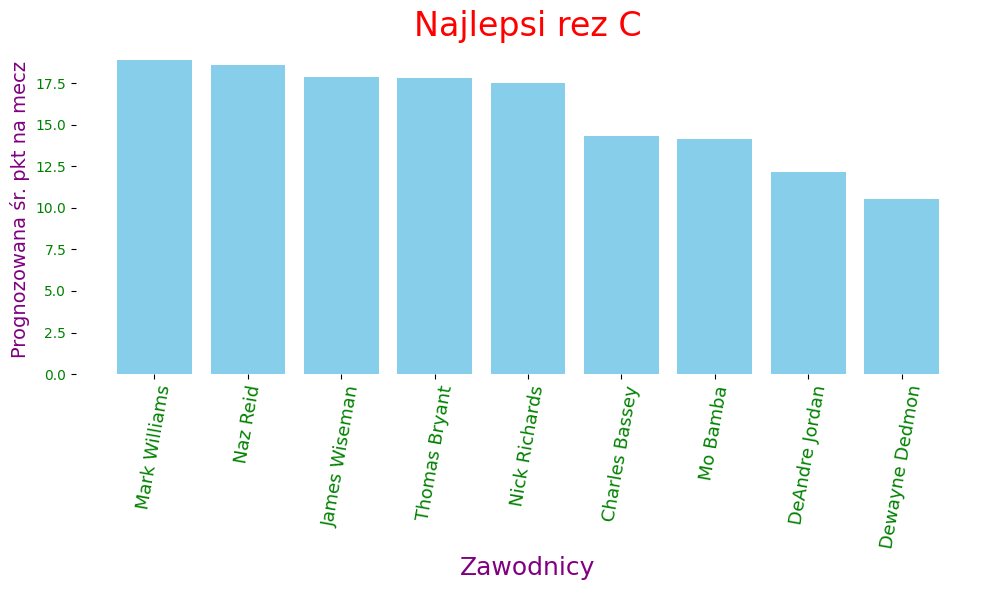

In [143]:
#dane do wykresu
x = sec_c['PName']
y = sec_c['virtual_pts']

#stworzenie wykresu

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue')
plt.xlabel('Zawodnicy', fontsize=18, color='purple')
plt.ylabel('Prognozowana śr. pkt na mecz', fontsize=14, color='purple')
plt.title('Najlepsi rez C', fontsize=24, color='red')
plt.xticks(rotation=80, fontsize=13, color='green')
plt.yticks(fontsize=10, color='green')
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.tight_layout()
#plt.savefig('c_rezerwowi.jpg')
plt.show()